# Regressione lineare multipla (multivariata) con cenni di regressione non-lineare


**Installazione delle nb extensions**

Da prompt anaconda:
* *pip install jupyter_contrib_nbextensions*
* *jupyter contrib nbextension install --user*

Uscire/rientrare in Jupyter.<br>
Attivare le nb extensions desiderate.


## Import dei package necessari

In [1]:
%matplotlib inline
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV  # <-- i package specifici
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

# alcune utility (comode): prima installare 'dmba' da prompt anaconda (pip install dmba)
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

from IPython.display import Image               # per importare in una cella di tipo CODICE un'immagine 

## Un'occhiata al dataset

In [2]:
# Un dataset di auto Toyota Corolla usate e del prezzo al quale nel passato sono state vendute.
# 38 predittori numerici e categorici (le caratteristiche delle auto), 1 risposta numerica (Price).
# Lo scopo: prevedere il prezzo di vendita per un'altra auto usata, con determinate caratteristiche (i valori dei predittori).

# Prendiamo le prime 1000 righe e tutte le colonne
car_df = pd.read_csv('data_regressione/ToyotaCorolla.csv')
car_df = car_df.iloc[0:1000]

car_df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


In [3]:
car_df.shape # 1000 righe, 39 colonne

(1000, 39)

In [4]:
### Variabili del dataset ToyotaCorolla
car_df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'],
      dtype='object')

In [5]:
car_df.dtypes # i tipi di dati ('object' un cattivo termine di python per indicare una stringa alfanumerica)

Id                    int64
Model                object
Price                 int64
Age_08_04             int64
Mfg_Month             int64
Mfg_Year              int64
KM                    int64
Fuel_Type            object
HP                    int64
Met_Color             int64
Color                object
Automatic             int64
CC                    int64
Doors                 int64
Cylinders             int64
Gears                 int64
Quarterly_Tax         int64
Weight                int64
Mfr_Guarantee         int64
BOVAG_Guarantee       int64
Guarantee_Period      int64
ABS                   int64
Airbag_1              int64
Airbag_2              int64
Airco                 int64
Automatic_airco       int64
Boardcomputer         int64
CD_Player             int64
Central_Lock          int64
Powered_Windows       int64
Power_Steering        int64
Radio                 int64
Mistlamps             int64
Sport_Model           int64
Backseat_Divider      int64
Metallic_Rim        

In [6]:
# Significato delle variabili del dataset ToyotaCorolla.

# Variable            Description

# Id                  Record_ID
# Model               Model Description
# Price               Offer Price in EUROs
# Age_08_04           Age in months as in August 2004
# Mfg_Month           Manufacturing month (1-12)
# Mfg_Year            Manufacturing Year
# KM                  Accumulated Kilometers on odometer
# Fuel_Type           Fuel Type (Petrol, Diesel, CNG=Gas Naturale Compresso)
# HP                  Horse Power
# Met_Color           Metallic Color?  (Yes=1, No=0)
# Color               Color (Blue, Red, Grey, Silver, Black, etc.)
# Automatic           Automatic ( (Yes=1, No=0)
# CC                  Cylinder Volume in cubic centimeters
# Doors               Number of doors
# Cylinders           Number of cylinders
# Gears               Number of gear positions
# Quarterly_Tax       Quarterly road tax in EUROs
# Weight              Weight in Kilograms
# Mfr_Guarantee       Within Manufacturer's Guarantee period  (Yes=1, No=0)
# BOVAG_Guarantee     BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
# Guarantee_Period    Guarantee period in months
# ABS                 Anti-Lock Brake System (Yes=1, No=0)
# Airbag_1            Driver_Airbag  (Yes=1, No=0)
# Airbag_2            Passenger Airbag  (Yes=1, No=0)
# Airco               Airconditioning  (Yes=1, No=0)
# Automatic_airco     Automatic Airconditioning  (Yes=1, No=0)
# Boardcomputer       Boardcomputer  (Yes=1, No=0)
# CD_Player           CD Player  (Yes=1, No=0)
# Central_Lock        Central Lock  (Yes=1, No=0)
# Powered_Windows     Powered Windows  (Yes=1, No=0)
# Power_Steering      Power Steering  (Yes=1, No=0)
# Radio               Radio  (Yes=1, No=0)
# Mistlamps           Mistlamps  (Yes=1, No=0)
# Sport_Model         Sport Model  (Yes=1, No=0)
# Backseat_Divider    Backseat Divider  (Yes=1, No=0)
# Metallic_Rim        Metallic Rim  (Yes=1, No=0)
# Radio_cassette      Radio Cassette  (Yes=1, No=0)
# Parking_Assistant   Parking assistance system  (Yes=1, No=0)
# Tow_Bar             Tow Bar  (Yes=1, No=0)


In [8]:
 # Consideriamo solo 10 predittori: 
predictors = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'CC', 
              'Doors', 'Quarterly_Tax', 'Weight']
outcome = 'Price' # risposta è numerica --> problema di previsione numerica

car_df[predictors]

,Age_08_04,KM,Fuel_Type,HP,Met_Color,Automatic,CC,Doors,Quarterly_Tax,Weight
0,23,46986,Diesel,90,1,0,2000,3,210,1165
1,23,72937,Diesel,90,1,0,2000,3,210,1165
2,24,41711,Diesel,90,1,0,2000,3,210,1165
3,26,48000,Diesel,90,0,0,2000,3,210,1165
4,30,38500,Diesel,90,0,0,2000,3,210,1170
...,...,...,...,...,...,...,...,...,...,...
995,68,42750,Petrol,110,1,0,1600,3,69,1050
996,67,42102,Petrol,110,1,0,1600,5,85,1075
997,63,41586,Petrol,110,1,0,1600,5,19,1114
998,64,41200,Petrol,110,0,0,1600,5,85,1070


![](images_regressione/DMforBA_Table6_1.png)

In [58]:
car_df[predictors].describe()

,Age_08_04,KM,HP,Met_Color,Automatic,CC,Doors,Quarterly_Tax,Weight
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,48.034000,62669.429000,102.188000,0.68300,0.048000,1590.180000,4.083000,90.160000,1079.156000
std,16.696215,35414.796253,15.571484,0.46554,0.213873,492.203496,0.953425,43.589063,58.123851
min,1.000000,1.000000,69.000000,0.00000,0.000000,1300.000000,2.000000,19.000000,1000.000000
25%,39.000000,38924.000000,97.000000,0.00000,0.000000,1400.000000,3.000000,69.000000,1045.000000
50%,52.000000,58288.500000,110.000000,1.00000,0.000000,1600.000000,4.000000,85.000000,1075.000000
75%,62.000000,79446.250000,110.000000,1.00000,0.000000,1600.000000,5.000000,85.000000,1100.000000
max,68.000000,243000.000000,192.000000,1.00000,1.000000,16000.000000,5.000000,283.000000,1615.000000


In [102]:
car_df[outcome].describe()

count     1000.000000
mean     11860.796000
std       3748.829864
min       4350.000000
25%       9450.000000
50%      10900.000000
75%      12950.000000
max      32500.000000
Name: Price, dtype: float64

In [9]:
car_df['Fuel_Type'].unique() # i 3 tipi di carburante (Diesel, Benzina, Gas naturale compresso)

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [10]:
round(car_df[outcome].describe(),2) # le statistiche numerice di prima, ma ora per la risposta (il prezzo)

count     1000.00
mean     11860.80
std       3748.83
min       4350.00
25%       9450.00
50%      10900.00
75%      12950.00
max      32500.00
Name: Price, dtype: float64

## La correlazione tra predittori numerici

### La matrice di correlazione

In [11]:
car_df[predictors].corr() # la matrice di correlazione tra predittori --> non sembrano esserci correlazioni 
                          # elevate, cioè > |0.6| - |0.7|,
                          # a meno della coppia Weight/Quarterly Tax (0.63).
    
# Per esempio, non potrebbe esserci nel dataset per la regressione una colonna 'mileage', che è perfettamente correlata con
# 'KM'. Le correlazioni (alte) tra predittori inficiano i risultati della regressione.
# Attenzione: le correlazioni delle singole variabili con la risposta invece sono utili --> mettere nel modello, possibilmente,
# proprio i predittori di questo tipo.

# Un altro dataset di auto toyota corolla usate e vendute potrebbe, ad esempiko, includere molte auto di persone attive (e 
# non pensionati) e poche seconde auto. In questo caso, è probabile che le due colonne KM e Age abbiano un coefficiente di
# correlazione positivo maggiore del precedente (0.55).

,Age_08_04,KM,HP,Met_Color,Automatic,CC,Doors,Quarterly_Tax,Weight
Age_08_04,1.000000,0.550858,-0.176269,-0.139372,-0.002980,-0.093984,-0.167445,-0.188490,-0.504819
KM,0.550858,1.000000,-0.345250,-0.092474,-0.068041,0.073586,-0.059569,0.283486,-0.076834
HP,-0.176269,-0.345250,1.000000,0.059873,0.054096,0.020641,0.068058,-0.297448,0.086617
Met_Color,-0.139372,-0.092474,0.059873,1.000000,-0.027989,0.037447,0.106697,0.011233,0.070489
Automatic,-0.002980,-0.068041,0.054096,-0.027989,1.000000,0.121195,0.000079,-0.054082,0.075250
CC,-0.093984,0.073586,0.020641,0.037447,0.121195,1.000000,0.073051,0.271509,0.287022
Doors,-0.167445,-0.059569,0.068058,0.106697,0.000079,0.073051,1.000000,0.102143,0.275265
Quarterly_Tax,-0.188490,0.283486,-0.297448,0.011233,-0.054082,0.271509,0.102143,1.000000,0.633912
Weight,-0.504819,-0.076834,0.086617,0.070489,0.075250,0.287022,0.275265,0.633912,1.000000


Alla luce di questa matrice è probabilmente consigliabile togliere dal modello una delle due variabili: *Quarterly_Tax* oppure *Weight*. Si dovrebbe ottenere un errore di test minore.

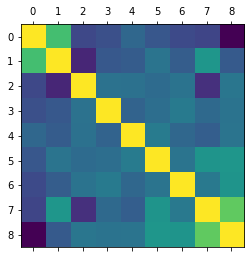

In [12]:
# la stessa matrice in formato grafico (indispensabile se p è grande) - so 29432629
import matplotlib.pyplot as plt
plt.matshow(car_df[predictors].corr())
plt.show()

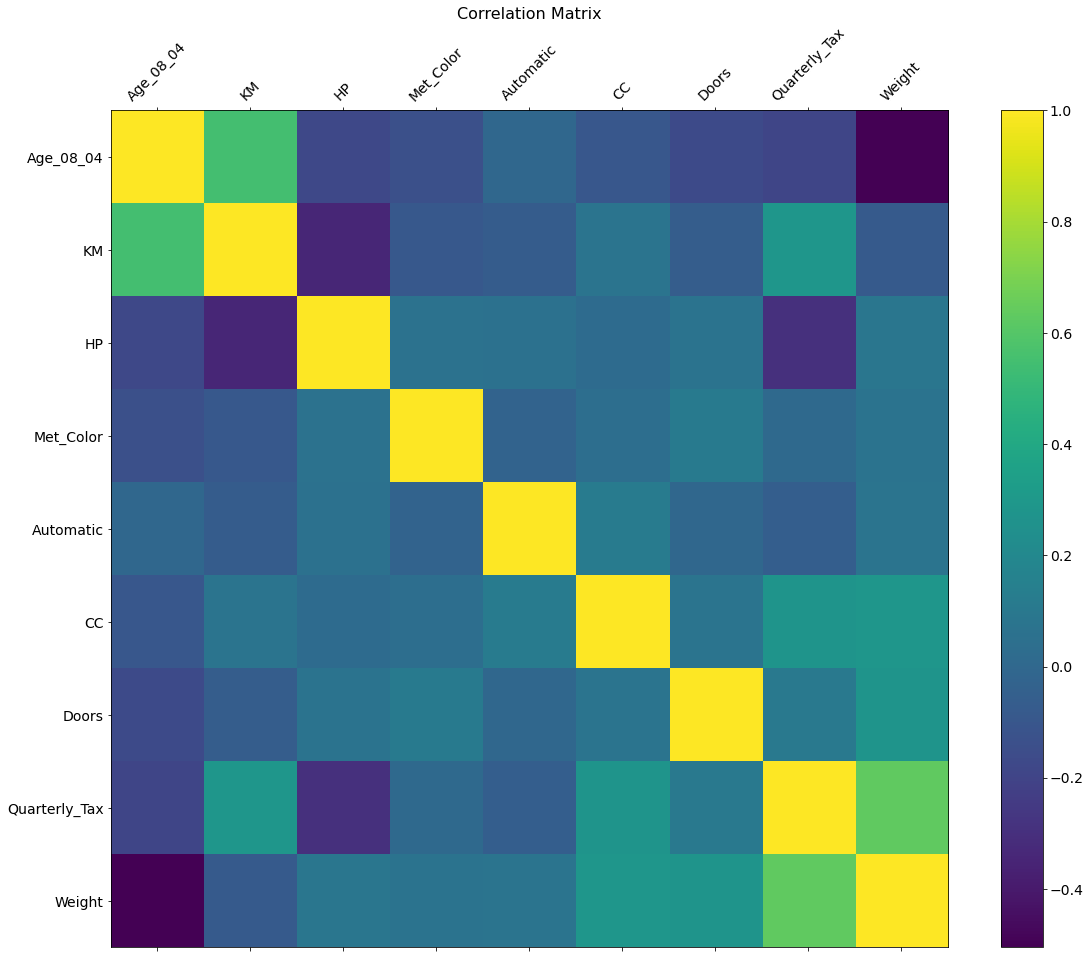

In [13]:
# lo stesso plot più grande e con una legenda dei colori - so 29432629
import matplotlib.pyplot as plt

f = plt.figure(figsize=(19, 15))
plt.matshow(car_df[predictors].corr(), fignum=f.number)
plt.xticks(range(car_df[predictors].select_dtypes(['number']).shape[1]), car_df[predictors].select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(car_df[predictors].select_dtypes(['number']).shape[1]), car_df[predictors].select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [14]:
# ed infine con pandas - so 29432629
import pandas as pd
import numpy as np
corr = car_df[predictors].corr()
corr.style.background_gradient(cmap='coolwarm') # 'RdBu_r', oppure 'BrBG_r', oppure ancora 'PuOr_r' sono altri buoni
                                                # schemi di colori divergenti.
    

,Age_08_04,KM,HP,Met_Color,Automatic,CC,Doors,Quarterly_Tax,Weight
Age_08_04,1.000000,0.550858,-0.176269,-0.139372,-0.002980,-0.093984,-0.167445,-0.188490,-0.504819
KM,0.550858,1.000000,-0.345250,-0.092474,-0.068041,0.073586,-0.059569,0.283486,-0.076834
HP,-0.176269,-0.345250,1.000000,0.059873,0.054096,0.020641,0.068058,-0.297448,0.086617
Met_Color,-0.139372,-0.092474,0.059873,1.000000,-0.027989,0.037447,0.106697,0.011233,0.070489
Automatic,-0.002980,-0.068041,0.054096,-0.027989,1.000000,0.121195,0.000079,-0.054082,0.075250
CC,-0.093984,0.073586,0.020641,0.037447,0.121195,1.000000,0.073051,0.271509,0.287022
Doors,-0.167445,-0.059569,0.068058,0.106697,0.000079,0.073051,1.000000,0.102143,0.275265
Quarterly_Tax,-0.188490,0.283486,-0.297448,0.011233,-0.054082,0.271509,0.102143,1.000000,0.633912
Weight,-0.504819,-0.076834,0.086617,0.070489,0.075250,0.287022,0.275265,0.633912,1.000000


In [15]:
# per avere il cutoff tra rossi e blu a zero, si fa:
import pandas as pd
import numpy as np
corr = car_df[predictors].corr()
corr.style.background_gradient(cmap='coolwarm',vmin=-1,vmax=1) # 'RdBu_r', oppure 'BrBG_r', oppure ancora 'PuOr_r' sono altri buoni
                                                               # schemi di colori divergenti.

,Age_08_04,KM,HP,Met_Color,Automatic,CC,Doors,Quarterly_Tax,Weight
Age_08_04,1.000000,0.550858,-0.176269,-0.139372,-0.002980,-0.093984,-0.167445,-0.188490,-0.504819
KM,0.550858,1.000000,-0.345250,-0.092474,-0.068041,0.073586,-0.059569,0.283486,-0.076834
HP,-0.176269,-0.345250,1.000000,0.059873,0.054096,0.020641,0.068058,-0.297448,0.086617
Met_Color,-0.139372,-0.092474,0.059873,1.000000,-0.027989,0.037447,0.106697,0.011233,0.070489
Automatic,-0.002980,-0.068041,0.054096,-0.027989,1.000000,0.121195,0.000079,-0.054082,0.075250
CC,-0.093984,0.073586,0.020641,0.037447,0.121195,1.000000,0.073051,0.271509,0.287022
Doors,-0.167445,-0.059569,0.068058,0.106697,0.000079,0.073051,1.000000,0.102143,0.275265
Quarterly_Tax,-0.188490,0.283486,-0.297448,0.011233,-0.054082,0.271509,0.102143,1.000000,0.633912
Weight,-0.504819,-0.076834,0.086617,0.070489,0.075250,0.287022,0.275265,0.633912,1.000000


### Il test della correlazione

I coefficienti di correlazione <x,y> sopra riportati sono stime **singole** (ottenute dal campione). Ovviamente, anche per il coefficiente di correlazione come per ogni statistica campionaria, è possibile **testare H0 (no correlazione)** tramite la funzione [`pearsonr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) di *scipy* (qui per i due predittori *Weight* e *Quarterly_Tax*): 

In [16]:
import scipy
from scipy.stats.stats import pearsonr

data_array = car_df[["Weight","Quarterly_Tax"]].to_numpy()  # la funzione 'peasonr' di scipy richiede in input due array 1D

x = data_array[:,0]  # Weight
y = data_array[:,1] # Quarterly_Tax

# correlation coefficient and p-value between x and y
scipy.stats.pearsonr(x, y)

(0.6339117434607975, 1.6981446825608678e-113)

La funzione `pearsonr` <u>non</u> fornisce l'intervallo di confidenza della stima singola (l'altra faccia del test di ipotesi).

### La correlazione dei predittori con la risposta

<u>Attenzione</u>: le correlazioni tra un predittore e la risposta sono invece una cosa buona, noi vogliamo cercare **proprio dei predittori che "correlano" con la risposta!**

In [17]:
car_df[['Weight','KM','Price']].corr() # la correlazione dei due predittori 'Weight' e 'KM' con la risposta 'Price'

,Weight,KM,Price
Weight,1.000000,-0.076834,0.612295
KM,-0.076834,1.000000,-0.596340
Price,0.612295,-0.596340,1.000000


Un modello di regressione fornisce <u>molte più informazioni inferenziali</u> (che la correlazione) e permette inoltre di <u>prevedere</u> la risposta.<br><br>
**Quali predittori** includere nel modello di regressione? La scelta tramite il loro coefficiente di correlazione con la risposta è solo **approssimativa**! [Molti Data Scientist si limitano purtroppo a questo UNICO criterio di inclusione]. Esistono ottime tecniche di *feature* selection (vedi più avanti). 

### La correlazione di Spearman

In [18]:
car_df[predictors].corr(method='spearman') # spearman intercetta i legami monotonici (ad es. Y=e^X);
                                           # utile anche quando i valori sono rank (posizioni);
                                           # qui risultati simili a Pearson?!

,Age_08_04,KM,HP,Met_Color,Automatic,CC,Doors,Quarterly_Tax,Weight
Age_08_04,1.000000,0.609114,-0.117580,-0.132965,0.004694,-0.130839,-0.166892,-0.287290,-0.478941
KM,0.609114,1.000000,-0.225881,-0.081695,-0.057804,0.176334,-0.068280,0.029796,-0.132124
HP,-0.117580,-0.225881,1.000000,0.092795,0.050016,0.337565,0.150648,0.032608,0.122420
Met_Color,-0.132965,-0.081695,0.092795,1.000000,-0.027989,0.061044,0.105787,0.050258,0.094682
Automatic,0.004694,-0.057804,0.050016,-0.027989,1.000000,0.002610,-0.001427,0.068039,0.112372
CC,-0.130839,0.176334,0.337565,0.061044,0.002610,1.000000,0.144266,0.532381,0.640832
Doors,-0.166892,-0.068280,0.150648,0.105787,-0.001427,0.144266,1.000000,0.334536,0.425470
Quarterly_Tax,-0.287290,0.029796,0.032608,0.050258,0.068039,0.532381,0.334536,1.000000,0.723352
Weight,-0.478941,-0.132124,0.122420,0.094682,0.112372,0.640832,0.425470,0.723352,1.000000


## La dipendenza tra predittori categorici

La correlazione è una misura di dipendenza tra predittori **numerici**.<br>
Per misurare l'eventuale dipendenza tra predittori **categorici**, o tra un predittore categorico ed uno numerico, si usa il [**test chi quadrato di *Pearson***](https://it.wikipedia.org/wiki/Test_chi_quadrato_di_Pearson), che utilizza una [tabella di contingenza](https://it.wikipedia.org/wiki/Tabella_di_contingenza) (spesso da creare ad hoc dal dataframe).<br>
In Python il test chi quadrato è implementato in scipy --> vedi [qui](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html), [**qui**](https://analyticsindiamag.com/a-beginners-guide-to-chi-square-test-in-python-from-scratch/) e [qui](https://towardsdatascience.com/chi-square-test-with-python-d8ba98117626).

[La statistica di test in oggetto](images_regressione/chi_square_formula.png) 

Vediamo un'applicazione al nostro dataset, utilizzando due predittori binari (*Automatic* e *Met_Color*), per i quali è cioè possibile misurare sia la correlazione numerica (come visto prima) che la dipendenza categorica.

In [19]:
# creazione della contingency table dal dataframe
cont_table = pd.crosstab(car_df["Automatic"],car_df["Met_Color"])
cont_table

Met_Color,0,1
Automatic,,
0,299,653
1,18,30


In [20]:
# esecuzione del test chi-quadrato sulla tabella di contingenza
import scipy as sp
sp.stats.chi2_contingency(observed=cont_table)
                            # --> 4 output

(0.5272711964085068,
 0.46775636987725366,
 1,
 array([[301.784, 650.216],
        [ 15.216,  32.784]]))

Vediamo i 4 output uno per uno.

In [21]:
sp.stats.chi2_contingency(observed=cont_table)[0] # il valore della statistica di test, da confrontare con il quantile della
                                                  # distribuzione chi-quadrato per alfa=0.05 e gdl=1 (in questo caso) = 3.84.
                                                  # 0.527 << 3.84.
                                                  # Si noti che il coefficiente di correlazione dei due predittori era quasi 0!

0.5272711964085068

![](images_regressione/test_chi_quadro_1.png)

In [22]:
sp.stats.chi2_contingency(observed=cont_table)[1] # il pvalue del test di ipotesi (H0: le due variabili sono indipendenti:
                                                  # in questo caso non possiamo non accettare)

0.46775636987725366

![](images_regressione/test_chi_quadro_2.png)

In [23]:
sp.stats.chi2_contingency(observed=cont_table)[2] # i gradi di libertà, (I-1) * (J-1) = 1 * 1 = 1 
                                                  # (con I e J numero delle classi dei due predittori)

1

In [24]:
sp.stats.chi2_contingency(observed=cont_table)[3] # i valori teorici ATTESI sotto H0, cioè variabili indipendenti; 
                                                  # sono calcolati in base alle somme marginali (vedi l'help).
                                                  # qui abbastanza simili ai valori effettivi della tabella 'cont_table'

array([[301.784, 650.216],
       [ 15.216,  32.784]])

**Un ottimo esempio** di un analogo test chi-quadrato (cioè con due variabili categoriche binarie) è riportato [qui](https://adrianogilardone.com/test-del-chi-quadrato-di-indipendenza/), insieme con la tavola della distribuzione chi-quadrato. 

## La regressione lineare OLS

La seguente figura illustra il modello REALE (non noto a parte casi particolari), non quello FITTATO dall'algoritmo, che non ha il termine di errore e la cui Y è quella MEDIA condizionata ai valori dei predittori.<br>
![](images_regressione/Modello_regressione.png)

Inventata ad inizio '800 da Legendre e Gauss, in modo indipendente.<br><br>
Termine coniato da sir Francis Galton a fine '800 per un fenomeno in realtà differente ("regressione verso la media").<br><br>
*Lineare* perchè il modello è espresso come **combinazione lineare** dei coefficienti beta-i.<br><br> 
**Multivariata** nella realtà perchè il caso univariato è spesso solo di scuola (1 solo predittore??)<br><br>
In ambito tecnico-scientifico le variabili predittore sono in genere assunte **deterministiche** (e non casuali) perchè si presume, in genere a ragione, che lo sperimentatore abbia il controllo delle variabili predittore, cioè possa **impostarne i valori sperimentali**. Ove anche dette variabili siano leggermente casuali, è sufficiente che la loro casualità sia di un ordine di grandezza inferiore a quella della epsison del modello. In alcuni ambiti, ad esempio le scienze sociali, è possibile che le variabili predittore siano <u>effettivamente casuali</u>, con una casualità anche consistente che non può essere compresa nel *catch-all* epsilon.<br><br>
Le variabili predittore possono essere **indifferentemente** numeriche o categoriche. Quelle categoriche devono essere preventivamente **trasformate in variabili booleane** (dette *dummy variable*) poichè le equazioni normali della regressione richiedono medie e scarti tra le X.i.<br><br>
Attenzione: <u>le incognite del modello sono i coefficienti *beta-i*</u>, non le variabili predittore che, essendo deterministiche, sono dei numeri.<br><br>
L'errore è modellato come additivo con media=0. Altri modelli di errore sono possibili, ma non con OLS.

In [25]:
# la regressione richiede che i predittori categorici (qui Fuel_Type, ma anche Automatic e Metallic) siano PRIMA trasformati in 
# dummy variable (binarie). servono k-1 dummy variable, dobe k è il numero di possibili valori distinti della variabile categorica (detti 'livelli').
# [k dv creano perfetta collinearità con l'intercetta - Johnson & Wichern, p. 377]
X = pd.get_dummies(car_df[predictors], drop_first=True) # 'drop_first': "Whether to get k-1 dummies out of k categorical levels 
                                                        # by removing the first level".
y = car_df[outcome]
X.head()
                                                        # --> 11 predittori, ora, perchè 'fuel_type' è stato sostituito dalla
                                                        #     coppia di dummy variabili 'Fuel_type_Diesel' e 'Fuel_Type_Petrol'

,Age_08_04,KM,HP,Met_Color,Automatic,CC,Doors,Quarterly_Tax,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,1,0,2000,3,210,1165,1,0
1,23,72937,90,1,0,2000,3,210,1165,1,0
2,24,41711,90,1,0,2000,3,210,1165,1,0
3,26,48000,90,0,0,2000,3,210,1165,1,0
4,30,38500,90,0,0,2000,3,210,1170,1,0


Se lo scopo è la sola comprensione dei dati, può essere sensato usare 'drop_first = False'.<br>
Ma se invece, come in questo caso, lo scopo è anche di costruire un modello di regressione (a partire da questi dati), allora conviene usare 'drop_first = True'. Il motivo: nell'equazione di regressione compare l'intercetta, la cui variabile è sempre 1. Con *k* dummy variable (cioè, 'drop_first = False') si crea **collinearità'** tra le dummy variable e l'intercetta. Cioè l'intercetta (=1) sarà SEMPRE semplicemente ottenibile come combinazione lineare (somma) delle dummy variable.<br>
Vedi le **due domande** sulle dummy variable a fine sezione sull'inferenza (cosa succede in concreto se creiamo *k* dv (anzichè *k-1*)? perchè non usare un'**unica variabile numerica**, con *k* valori, anzichè le dv?).

In [26]:
X.dtypes      # i tipi di dati ('object' un cattivo termine di python per indicare una stringa alfanumerica)
              # perchè 'Met_Color' e 'Automatic' sono ancora numeriche e non binarie?? 

Age_08_04           int64
KM                  int64
HP                  int64
Met_Color           int64
Automatic           int64
CC                  int64
Doors               int64
Quarterly_Tax       int64
Weight              int64
Fuel_Type_Diesel    uint8
Fuel_Type_Petrol    uint8
dtype: object

In [27]:
# il consueto partizionamento dei dati
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1) # 'valid' qui indica 'test'

In [28]:
train_X

,Age_08_04,KM,HP,Met_Color,Automatic,CC,Doors,Quarterly_Tax,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
731,62,85000,110,1,0,1600,3,69,1050,0,1
716,60,89576,110,0,0,1600,4,69,1035,0,1
640,68,119541,110,0,0,1600,3,85,1055,0,1
804,64,73300,86,1,0,1300,3,69,1015,0,1
737,62,83908,110,1,0,1600,5,85,1070,0,1
...,...,...,...,...,...,...,...,...,...,...,...
767,57,78955,86,1,0,1300,5,69,1045,0,1
72,28,28817,110,1,0,1598,5,85,1130,0,1
908,66,58654,110,1,0,1600,5,85,1070,0,1
235,38,60829,110,1,0,1600,5,85,1075,0,1


In [29]:
valid_X

,Age_08_04,KM,HP,Met_Color,Automatic,CC,Doors,Quarterly_Tax,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
507,55,54900,97,1,0,1400,5,85,1060,0,1
818,62,70500,110,1,0,1600,5,69,1035,0,1
452,49,73175,97,1,0,1400,3,69,1030,0,1
368,37,21500,110,1,0,1600,5,69,1030,0,1
242,43,58277,110,1,0,1600,3,69,1045,0,1
...,...,...,...,...,...,...,...,...,...,...,...
459,53,70239,110,0,0,1600,3,69,1040,0,1
415,55,97234,110,0,0,1600,5,85,1080,0,1
61,27,37177,110,0,0,1600,5,85,1130,0,1
347,38,28150,110,1,0,1600,5,85,1075,0,1


In [30]:
train_y

731    10450
716     8750
640     9950
804     8900
737     8750
       ...  
767     9500
72     18950
908     8250
235    11650
37     14950
Name: Price, Length: 700, dtype: int64

In [31]:
valid_y

507    11500
818     8950
452    11450
368    11450
242    11950
       ...  
459    10990
415     9950
61     16500
347    13750
349    12750
Name: Price, Length: 300, dtype: int64

In [32]:
valid_y.describe()

count      300.00000
mean     11934.88000
std       3809.49434
min       4350.00000
25%       9537.50000
50%      10750.00000
75%      13025.00000
max      31275.00000
Name: Price, dtype: float64

In [33]:
# i soliti metodi di scikit-learn, ora, applicati alla classe 'LinearRegression':

car_lm = LinearRegression()     # il costruttore (in altri linguaggi OO questo metodo si chiama 'new')

                                # fit_intercept : bool, default=True.
                                # Whether to calculate the intercept for this model. If set to False, no intercept will be 
                                # used in calculations (i.e. data is expected to be centered). 
                                # L'intercetta è la media delle Y osservate, si chiama "modello nullo", cioè è la Y spiegata
                                # in assenza di predittori. 
            
                                # No intercetta è un'ipotesi forte (y e X.i sono proporzionali!) oppure i dati sono CENTRATI.
                
                                # From the implementation point of view, this is just plain Ordinary
                                # Least Squares (scipy.linalg.lstsq) wrapped as a predictor object.


In [34]:
print(car_lm.get_params())     # --> i valori degli ARGOMENTI di input al metodo (in scikit-learn detti "parametri"!) della 
                               # istanza creata. NON sono i parametri in senso statistico!

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': False}


In [35]:
car_lm.fit(train_X, train_y)    # il fit sui dati di training

                                # output:
    
                                # self : returns an instance of self.
                                # [e quindi gli output sono descritti nel metodo costruttore] 
            
                                #    intercept_ : float or array of shape (n_targets,)
                                #    Independent term in the linear model. Set to 0.0 if
                                #    `fit_intercept = False`.
            
                                #    coef_ : array of shape (n_features, ) or (n_targets, n_features).
                                #                 Estimated coefficients for the linear regression problem.

                                #    rank_ : int
                                #    Rank of matrix X.


LinearRegression()

In [37]:
# ed ecco i coefficienti beta.i stimati (con il metodo OLS), cioè i b.i, ovvero i PARAMETRI in senso statistico.
print('intercept ', car_lm.intercept_,'\n')                                 # beta.0 stimato
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': car_lm.coef_}))  # beta.1 - beta.p stimati (p= numero dei predittori)

                               # --> più 1 HP, alza il prezzo medio di 35.53;
                               #     metalizzato, alza il prezzo medio di 34.88;
                               #     più 1 anno, abbassa il prezzo medio di 134.68;
                               #     più 1 porta, abbassa il prezzo medio di 84.52;
                               #     più 1 KM, abbassa il prezzo medio di 0.01 (coefficiente basso, ma i km di differenza 
                               #     sono molti!);
                               #     ecc.
                               #     l'intercetta non ha un significato applicativo (cosa significa una macchina con HP=0?
                               #     oppure con Weight=0?)

intercept  -2798.4089298017116 

           Predictor  coefficient
0          Age_08_04  -138.401332
1                 KM    -0.017528
2                 HP    37.221724
3          Met_Color    33.461680
4          Automatic   432.587374
5                 CC     0.001024
6              Doors   -72.263102
7      Quarterly_Tax    15.421327
8             Weight    13.963315
9   Fuel_Type_Diesel  1053.536101
10  Fuel_Type_Petrol  2604.842454


**Note**:
* "LinearRegression fits a linear model with coefficients beta.i-hat = (beta.0-hat, beta.1-hat..., beta.p-hat) to **minimize the residual sum of squares** (RSS) between the observed response values in the dataset, and the response values predicted by the linear approximation;"
* l'intercetta rappresenta la risposta MEDIA in assenza di predittori;
* per i predittori <u>numerici</u>, ogni coefficiente stimato (beta.i-hat) è da interpretare così: **<u>il contributo MEDIO alla risposta Y dato da un aumento UNITARIO del predittore i-esimo tenendo FISSI gli altri predittori</u>**;
* per i predittori <u>categorici</u>: ogni coefficiente stimato (beta.i-hat) è da interpretare così: **<u>il contributo MEDIO alla risposta Y dato da un incremento di livello rispetto al livello *baseline* (tenendo FISSI gli altri predittori)</u>**
* questa interpretazione ha senso *solo se i predittori non sono correlati tra loro*;
* la regressione OLS tende a stimare tutti i coefficienti diversi da zero (magari anche di poco), e dunque R2 cresce sempre al crescere del numero di predittori!

In [38]:
car_lm.rank_  # il rango della matrice X (ed X'X),
              # cioè, il numero di vettori colonna di X linerarmente indipendenti (in modo ESATTO!). Ci può cioè essere
              # multicollinearità tra predittori senza che X (e X'X) sia deficiente di rango.

11

<u>Nota matematica</u>:<br><br>
Il metodo OLS prevede, per trovare i coefficienti *beta.i* stimati, la risoluzione delle cosiddette [*equazioni normali*](images_regressione/Equazione_normale.png). Vedi anche [qui](https://it.wikipedia.org/wiki/Regressione_lineare).<br><br>
Ciò richiede appunto **l'inversione** della matrice *gramiana X'X* (simmetrica *pxp*), che sostanzialmente, a meno di un fattore di rescaling, è la matrice di varianza/covarianza delle X.<br><br>
Se i predittori <u>non</u> sono linearmente indipendenti, cioè se c'è collinearità tra di essi (come è frequente), oppure se p > n, la matrice gramiana X'X è **singolare**, cioè non invertibile. [NB. **Una matrice singolare non ha rango pieno**: sono due affermazioni equivalenti in algebra lineare]<br><br>
Poichè l'inversione di una matrice grande è un'operazione comunque difficile computazionalmente, anche se la matrice è non-singolare, ed è un'operazione *instabile* (cioè con variabilità elevata), i tool di Machine Learning comunque eseguono <u>una decomposizione preliminare di X'X</u>, in genere [una decomposizione QR](https://www.quantstart.com/articles/QR-Decomposition-with-Python-and-NumPy/). Le due matrici Q ed R ottenute sono infatti rispettivamente ortogonale e triangolare, e come tali sono facilmente invertibili. Un'alternativa è l'uso di un metodo iterativo come il *Gradient Descent*.

La comprensione di questo aspetto algebrico è importante per una applicazione consapevole della regressione.

In [39]:
print(car_lm.score(train_X, train_y))  # R2 (il famoso "coefficiente di determinazione").
                                       # R2, RSS e RSE (tutti collegati) sono misure di qualità del fit (sui dati sui quali
                                       # il modello è stato costruito), non di accuratezza (si usa MSE, oppure RMSE sul test).

                                       # Attenzione: 'score' è un'altra classe scikit-learn, NON è un output del fit. 
                                       # [Come 'get_params' vista prima].
                                       # Ed infatti occorre ripassare gli argomenti 'train_x' e 'train_y'. 

0.8626207791570183


[significato R2 - esempi](images_regressione/R2_meaning.png)

[R2 da scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score)<br>
[R2 da Wikipedia IT](https://it.wikipedia.org/wiki/Coefficiente_di_determinazione)<br>
[R2 sul test set NON funziona](https://stackoverflow.com/questions/25691127/r-squared-on-test-data/36727900)<br>
[R2 negativo??](https://stats.stackexchange.com/questions/12900/when-is-r-squared-negative)

**La regressione è cosa diversa dalla correlazione**.<br>
Infatti la correlazione:
* SIGNIFICATO: è una <u>misura statistica</u> che determina la co-relazione tra due variabili casuali (la loro *associazione*);
* SCOPO: serve a rappresentare la relazione lineare tra due variabili;
* VARIABILI: non c'è differenza tra le due variabili;
* INDICA: la **misura** (intensità, magnitudine) con la quale le due variabili si muovono insieme;
* OBIETTIVO: trovare un valore numerico che esprima la relazione tra le due variabili.<br>
* NUMERO VARIABILI: solo 2.

Al contrario, la regressione:
* SIGNIFICATO: descrive come una variabile indipendente è  numericamente spiegata/prevista dalla variabile dipendente;
* SCOPO: si usa per fittare una retta/piano/iperpiano ai dati e poter così stimare la variabile dipendente per nuovi valori (non osservati) di quella indipendente;
* VARIABILI: sono diverse; una è indipendente e l'altra dipendente; non si possono invertire;
* INDICA: l'impatto di una variazione di unità della variabili dipendente e nota sulla variabile indipendente (stimata);
* OBIETTIVO: valutare i valori della variabile dipendente (casuale) sulla base dei valori di quella indipendente (fissa);
* NUMERO VARIABILI: anche molto grande (1 risposta ed N predittori/feature).

C'è comunque **una relazione tra regressione e correlazione**.<br>
Nella regressione univariata (cioè con un solo predittore), **R2 = corr(X,Y)^2**. Per questo motivo, per avere un R2 minimamente interessante (almeno 0.5 - 0.6) la correlazione tra X e Y dev'essere **> 0.7 - 0.8**. [Regola pratica di Devore](images_regressione/Regola_Devore.png).<br>
Nella regressione multivariata (cioè con p predittori), **R2 = corr(Y,Y-hat)^2**.

## L'inferenza

In [40]:
# La regressione è più correttamente seguita sulla matrice Z (cioè, con una colonna di 1 in più), detta 
# DESIGN MATRIX.

import statsmodels.api as sm
from scipy import stats

Z = sm.add_constant(X)            # Add a column of ones to an array. 
                                  
                                  # "Per rilevare la collinearità dei predittori la 'design matrix' dev'essere costruita
                                  # sui dati NON CENTRATI, includendo nel modello anche l'intercetta (Draper & Smith, p. 373).
            
Z

C:\Users\Utente\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Age_08_04,KM,HP,Met_Color,Automatic,CC,Doors,Quarterly_Tax,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,1.0,23,46986,90,1,0,2000,3,210,1165,1,0
1,1.0,23,72937,90,1,0,2000,3,210,1165,1,0
2,1.0,24,41711,90,1,0,2000,3,210,1165,1,0
3,1.0,26,48000,90,0,0,2000,3,210,1165,1,0
4,1.0,30,38500,90,0,0,2000,3,210,1170,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,68,42750,110,1,0,1600,3,69,1050,0,1
996,1.0,67,42102,110,1,0,1600,5,85,1075,0,1
997,1.0,63,41586,110,1,0,1600,5,19,1114,0,1
998,1.0,64,41200,110,0,0,1600,5,85,1070,0,1


In [41]:
# Usiamo ora un altro stimatore python (sempre di regressione), sm.OLS, che fornisce un output molto ricco.
# E uno stimatore della libreria 'statsmodels' (non più di 'scikit-learn')

import statsmodels.api as sm    
from scipy import stats

est = sm.OLS(y, Z)                  # DMforBA (table 6.10), stack overflow 27928275
                                    # il solito metodo costruttore.
    
est2 = est.fit()                    # riassegnazione necessaria, altrimenti non funziona
print(est2.summary())

# NB. NON abbiamo ancora fatto 'predict', sinora!

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     599.3
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:55:23   Log-Likelihood:                -8628.8
No. Observations:                1000   AIC:                         1.728e+04
Df Residuals:                     988   BIC:                         1.734e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -6419.2947   1398.202  

[Le parti più importanti in questo output](images_regressione/Interpretazione_output_OLS.png)

**Interpretazione dell'output:**
* il modello nel suo insieme è significativo? cioè almeno un predittore spiega la risposta? --> statistica F (il suo p-value <0.05??);
* i singoli coefficienti sono significativi ? --> statistiche t (i p-value < 0.05%) con la 
[correzione di bonferroni](https://it.wikipedia.org/wiki/Correzione_di_Bonferroni). [Esempio](images_regressione/pvalue_critici.png);
* il modello è utile? --> R2 aggiustato (nb. R2, R2 aggiustato, RSS e RSE sono metriche collegate, e si misurano sul dataset sul quale il modello è stato costruito per valutarne la **qualità del fit**. Sono misure di inferenza, non di previsione.)
* assunzioni soddisfatte? --> vedi dopo.

[Interpreting linear regression through statmodels-summary()](https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a)

**Nota sulla significatività**<br>
Un predittore è *significativo* <u>(ad un certo livello alpha)</u> NON se il suo coefficiente stimato è grande MA in base al rapporto tra stima puntuale e standard error.<br>Quindi:
* anche un beta.i-hat molto grande (che sarebbe comunque sbagliato non considerare sempre con molta attenzione) può essere statisticamente non-significativo se il suo standard error è anch'esso molto grande, sino a determinare un intervallo di confidenza (a quel livello di alpha) che avvicina od addirittura include lo 0, cioè la non-significatività del predittore;
* al contrario, qualsiasi beta.i-hat che non sia esattamente 0, non importa quanto vicino a 0, sarà statisticamente significativo per qualsiasi livello di alpha se lo standard error è molto piccolo (più piccolo della magnitudo di beta.i-hat);
* occorre dunque distinguere tra **significatività numerica (la magnitudo) e significatività statistica**.


**Note su alpha**:
* una questione fondamentale è sottesa all'interpretazione della regressione (e di qualsiasi test statistico): **qual è il valore di alpha giusto?** [alpha è il cosiddetto *errore di prima specie*, ovvero la probabilità di rifiutare una ipotesi vera, ed è il treshold col quale confrontiamo il valore del p.value nei test statistici: se p.value < alpha --> rifiutiamo H0 (perchè, come si dice in gergo statistico, "siamo caduti nella coda della distribuzione"), se p.value > alpha --> accettiamo H0]. alpha dev'essere deciso dallo sperimentatore <u>caso per caso</u>, in base al **suo** rischio accettabile. E' purtroppo diffusa l'abitudine, anche in studi scientifici di alto livello, di scegliere alpha **in modo acritico al 5%**. E ciò perchè 5% sarebbe lo standard. No, alpha = 5% fu semplicemente <u>il valore scelto da Fisher</u> in alcune sue pubblicazioni.
* una malpractice, abbastanza diffusa, è quella di fare l'esperimento e poi, a valle, scegliere alpha. In questo modo si possono aggiustare un pò le conclusioni, ma è un modo intellettualmente disonesto: alpha **dev'essere scelto PRIMA dell'esperimento o comunque del fit**, in base alla valutazione dei rischi di errore.

In [42]:
# Cosa succede se tolgo dal modello i predittori PIU' significativi?

import statsmodels.api as sm    
from scipy import stats

est = sm.OLS(y, Z.drop(columns=['Age_08_04','KM','HP','Quarterly_Tax','Weight']))        
                                    # DMforBA (table 6.10), stack overflow 27928275
                                    # il solito metodo costruttore.
    
est2 = est.fit()                    # riassegnazione necessaria, altrimenti non funziona
print(est2.summary())

# NB. NON abbiamo ancora fatto 'predict', sinora!

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     11.94
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           5.66e-13
Time:                        14:55:51   Log-Likelihood:                -9612.8
No. Observations:                1000   AIC:                         1.924e+04
Df Residuals:                     993   BIC:                         1.927e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5380.1898   1152.038  

In [43]:
# Cosa succede se tolgo dal modello i predittori MENO significativi? (più sensato di prima)

import statsmodels.api as sm    
from scipy import stats

est = sm.OLS(y, Z.drop(columns=['Met_Color','Automatic','CC','Doors','Fuel_Type_Diesel']))        
                                    # DMforBA (table 6.10), stack overflow 27928275
                                    # il solito metodo costruttore.
    
est2 = est.fit()                    # riassegnazione necessaria, altrimenti non funziona
print(est2.summary())

# NB. NON abbiamo ancora fatto 'predict', sinora!

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1096.
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:55:52   Log-Likelihood:                -8631.9
No. Observations:                1000   AIC:                         1.728e+04
Df Residuals:                     993   BIC:                         1.731e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -6292.8024   1364.218  

Attenzione: in realtà, occorre eliminare dal modello UN predittore PER VOLTA (e non tanti insieme): vedi la sezione sulla *Selezione manuale dei predittori*.

**Scale invariance**<br>
La regressione OLS è invariante di scala, cioè i risultati non cambiano con l'unità di misura delle variabili.<br>
Infatti, se le variabili sono riscalate di un fattore c, ad esempio da metri a kilometri con c=1000, i coefficienti stimati risultanti dal fit sono moltiplicati per c, sicchè il prodotto xici è costante.<br>
Quindi, in concreto, NON è necessario standardizzare i dati prima della regressione, a differenza di altri metodi statistici (Ridge Regression oppure Clustering).<br>

Se invece, per il fit della regressione lineare, anzichè OLS si usa il metodo iterativo della **discesa del gradiente**, è allora utile standardizzare i dati preliminarmente per una convergenza più rapida [*PML v2*]. A questo scopo si può ad esempio usare la classe `StandardScaler` di `sklearn.preprocessing`. In certe applicazioni, è poi utile riconvertire indietro le previsioni della regressione nella loro scala originale (per una migliore comprensione). Si può allora usare il metodo `inverse_transform` di `StandardScaler`.

**La variabilità delle stime dei coefficienti**

![](images_regressione/Variabilita_coefficienti.png)

**La *design* matrix**<br><br>
La variabilità delle stime dei coefficienti può dunque essere modificata dalla design matrix, che appunto tradizionalmente prende questo nome perchè (spesso) **sotto il controllo dello sperimentatore**.<br><br>
La design matrix è spesso indicata con **Z**, anzichè X, non perchè sia standardizzata (OLS è scale-invariant), ma per ricordare che contiene la prima colonna di 1, a differenza di X.<br><br>
Ecco dei possibili schemi di campionamento del predittore unico (caso univariato) e l'impatto sulle stime.

![](images_regressione/Schemi_campionamento.png)

In [44]:
# lo stimatore sm.OLS fornisce anche gli Intervalli di Confidenza dei parametri:
import statsmodels.api as sm    
from scipy import stats

mod = sm.OLS(y, Z)
res = mod.fit()
print (res.conf_int(0.05))        # alfa=0.05 --> 95% confidence interval
print (res.conf_int(0.01))        # alfa=0.01 --> 99% confidence interval
print (res.conf_int(0.1))         # alfa=0.1  --> 90% confidence interval
print (res.conf_int(0))           # alfa=0    --> 100% confidence interval

                            0            1
const            -9163.082241 -3675.507253
Age_08_04         -139.798895  -125.022036
KM                  -0.022146    -0.015162
HP                  27.370032    42.769282
Met_Color         -125.564396   243.286895
Automatic         -169.626336   648.769795
CC                  -0.206438     0.164397
Doors             -163.742280    25.707690
Quarterly_Tax       11.973223    19.851485
Weight              14.755216    20.045084
Fuel_Type_Diesel  -182.544324  1491.487961
Fuel_Type_Petrol  1711.746816  3361.202645
                             0            1
const            -10027.795823 -2810.793671
Age_08_04          -142.127382  -122.693548
KM                   -0.023247    -0.014061
HP                   24.943470    45.195844
Met_Color          -183.686741   301.409239
Automatic          -298.586441   777.729900
CC                   -0.264873     0.222832
Doors              -193.595168    55.560578
Quarterly_Tax        10.731793    21.092915
W

In [45]:
print (res.conf_int(0.10))        # 90% confidence interval (più ristretti)

                            0            1
const            -8721.291401 -4117.298093
Age_08_04         -138.609247  -126.211683
KM                  -0.021584    -0.015724
HP                  28.609787    41.529527
Met_Color          -95.869108   213.591607
Automatic         -103.739325   582.882784
CC                  -0.176583     0.134542
Doors             -148.490140    10.455550
Quarterly_Tax       12.607482    19.217226
Weight              15.181090    19.619210
Fuel_Type_Diesel   -47.772202  1356.715838
Fuel_Type_Petrol  1844.540350  3228.409111


## (Multi)-collinearità tra predittori numerici 
La verifica della multi-collinearità tra predittori numerici (*collinearity detection*).

La correlazione, vista sopra, è sempre e solo, per definizione, tra COPPIE di variabili (numeriche).<br>
Ma ci possono essere delle correlazioni MULTIPLE, cioè 2+ variabili tra loro correlate. Sono esse rilevabili esaminando la matrice di correlazione? Non sempre! (Draper & Smith)<br>

La statistica classica suggerisce allora, se si sospetta multi-collinearità, di calcolare i VIF.<br>

**VIF : Variance Inflation Factor**:
* il VIF determina la **forza** della correlazione tra vari predittori, e si calcola per ogni predittore;
* il VIF di un predittore è uno score ottenuto <u>regredendo</u> il predittore rispetto a tutti gli altri predittori;
* lo score VIF di un predittore rappresenta quindi quanto bene il predittore è spiegato dagli altri predittori. 
* VIF > 5-10: **può** essere presente multi-collinearità tra questo predittore e gli altri;
* VIF > 100: c'è una multi-collinearità **certa** tra questo predittore e gli altri (--> eliminarlo dal modello).

    **Nota matematica**: i VIF forniscono utili indicazioni di possibili / probabili relazioni tra predittori. Un metodo ancor più preciso è [l'indice di Belsley](http://fmwww.bc.edu/EC-P/wp190.pdf). Utili indicazioni sono anche riportate nell'ottima voce ["Multicollinearity" di Wikipedia - sezione *Detection*](https://en.wikipedia.org/wiki/Multicollinearity). [NB. Il rango della matrice Z'Z non è una informazione sufficiente per rilevare la multi-collinearità dei predittori perchè esso non è pieno solo se esistono combinazioni lineari del predittori esatte!] Per conoscere <u>quante</u> relazioni ci sono tra predittori occorre verificare quanti [autovalori](https://it.wikipedia.org/wiki/Autovettore_e_autovalore) della matrice Z'Z sono esattamente od approssimativamente uguali a 0 [*Draper & Smith*]. 

[Come si rileva la multi-collinearità con il VIF in python](https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# costruiamo il dataframe dei VIF
vif_data = pd.DataFrame()                      # il df vuoto
vif_data["predictor"] = X.iloc[:,0:9].columns  # la colonna 'predictor' 
  
# il calcolo del VIF per ogni predittore
vif_data["VIF"] = [variance_inflation_factor(X.iloc[:,0:9].values, i)
                         for i in range(len(X.iloc[:,0:9].columns))]
  
print(vif_data)

       predictor         VIF
0      Age_08_04   14.726491
1             KM    7.925428
2             HP   58.490357
3      Met_Color    3.241006
4      Automatic    1.082649
5             CC   12.957347
6          Doors   21.219883
7  Quarterly_Tax   10.133533
8         Weight  128.188065


Questi VIF suggeriscono che forse è bene togliere dal modello il predittore *Weight*. Dalla matrice di correlazione vista prima sapevamo che *Weight* è correlata con *Quarterly Tax* (0.63) e con *Age* (-0.5). Ma si trattava di due <u>correlazioni separate</u>, sicchè avremmo potuto togliere dal modello sia *Weight* che *Quarterly Tax* (ed al limite anche *Age*). Ora l'indicazione è più precisa.<br>

NB. L'esame dei p-value dei predittori (e l'esclusione progressiva dal modello dei predittori con p.value più alto) è una tecnica (ottima e molto usata) per individuare ed eliminare i predittori che **NON spiegano la risposta**, e non specificamente quelli multicollinerari.<br><br>
Vediamo ora un esempio di collinearità tra predittori ancor più evidente. 

In [47]:
# come esempio, aggiungiamo una colonna somma di altre tre.
# ci aspettiamo per quella colonna un VIF molto, molto alto!

X_red = X.drop(columns=["Fuel_Type_Diesel","Fuel_Type_Petrol"])   # liberiamoci delle ultime due colonne (scomode perchè 
                                                                  # 'sum' è poi aggiunta in coda al df)
    
X_red["Sum"] = X_red[["Age_08_04","KM","Weight"]].sum(axis=1)     # la nuova colonna somma

# costruiamo ora il df dei VIF:
vif_data = pd.DataFrame()                             # il df vuoto
vif_data["predictor"] = X_red.iloc[:,0:10].columns    # aggiungiamo la colonna 'predictor'
  
# il calcolo del VIF per ogni predittore:
vif_data["VIF"] = [variance_inflation_factor(X_red.iloc[:,0:10].values, i)
                         for i in range(len(X_red.iloc[:,0:10].columns))]
  
vif_data
                               # --> sia 'Sum' che le altre 3 variabili hanno ora VIF = inf, perchè ciascuna delle quattro
                               #     può essere espressa come combinazione lineare delle altre tre! 

C:\Users\Utente\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,predictor,VIF
0,Age_08_04,inf
1,KM,inf
2,HP,58.490357
3,Met_Color,3.241006
4,Automatic,1.082649
5,CC,12.957347
6,Doors,21.219883
7,Quarterly_Tax,10.133533
8,Weight,inf
9,Sum,inf


Casi *tipici* di multi-collinearità tra predittori sono:
* una colonna di **somma** o **totale** di altre colonne;
* una colonna che ridefinisce un'altra colonna con una **diversa unità di misura** (ad esempio KM anzichè miglia);
* una colonna definita come **rapporto** di altre due colonne (frequente tra indicatori finanziari)? No, non è una combinazione lineare!

**Nota per matematici**:<br>
* "per rilevare la collinearità dei predittori la 'design matrix' dev'essere costruita sui dati NON CENTRATI, includendo nel modello anche l'intercetta (Draper & Smith, p. 373);
* se i predittori sono esattamente correlati:
  * det(Z'Z) = 0 (corretto) [perchè una matrice singolare ha sempre det=0] 
  * det (X'X) = un numero negativo enorme (errore di computazione)
  * prof. Berrone (PoliTO);
* condition number della matrice Z'Z --> più alto è, maggiore è la singolarità di Z'Z. Cioè, in altri termini, Z'Z non è di rango pieno --> collinearità tra predittori;
* se i predittori sono poco/niente correlati, il condition number di Z'Z è di qualche unità/decina;
* occorre misurare la collinearità su Z'Z, e non su X'X (Draper & Smith, ch. 16)

In [48]:
import numpy as np
print(np.linalg.cond(Z)) # di Z oppure di Z'Z 

2353247.6792866024


La multi-collinearità (tra predittori del modello) presenta due problemi [*prof. Secchi, PoliMI*], uno **numerico** (l'inversione della matrice X'X, oppure di Z'Z), l'altro **statistico** (qualche predittore è combinazione lineare di altri -> R2.j alto, vif.j alto, var(beta.j) alta, **<u>var(f(x0)) alta</u>**.<br>
Quale dei predittori correlati tolgo? Quello con p.value più alto? Non c'è una regola unica.

## La previsione

In [101]:
# ed infine vediamo le varie prestazioni predittive (cioè di accuratezza) del modello. 
# Sul test set.

regressionSummary(valid_y, car_lm.predict(valid_X))  #  la solita utility 

pred_y = car_lm.predict(valid_X)

print('\n')
print('adjusted r2 : ', adjusted_r2_score(valid_y, pred_y, car_lm),'\n') # R2 adjusted tiene conto del numero di predittori
                                                                         # (aggiungendo predittori R2 cresce sempre, invece)
print('AIC : ', AIC_score(valid_y, pred_y, car_lm),'\n')                 # AIC piccolo è meglio
print('BIC : ', BIC_score(valid_y, pred_y, car_lm))                      # BIC piccolo è meglio


Regression statistics

                      Mean Error (ME) : 30.2967
       Root Mean Squared Error (RMSE) : 1312.4196
            Mean Absolute Error (MAE) : 1022.4243
          Mean Percentage Error (MPE) : -1.0046
Mean Absolute Percentage Error (MAPE) : 9.0686


adjusted r2 :  0.8763655398002912 

AIC :  5185.139775133977 

BIC :  5233.288947304508


**Adjusted R2 vs RMSE**<br>
<u>(Adjusted) R2</u> è una misura della **bontà del fitting** (*goodness of fit, gof*) sui **dati di training** (ha poco senso sui dati di test). Al contrario, <u>RMSE</u> (la metrica previsionale forse migliore nella regressione) si calcola sul **test set** (ha poco senso calcolarlo sui dati di training.)
<br>
RMSE è espresso nell'unità di misura della risposta (qui in euro); <u>al contrario di R2, più è basso, meglio è</u> (perchè è un errore); ha due scopi:
* per confrontare le prestazioni predittive (accuratezza ed errore) di **differenti modelli**: quale ha RMSE più basso? --> scelgo *quel* modello; cioè, RMSE è usato solo comparativamente;
* secondo scopo: fornisce un'indicazione dell'**errore MEDIO di previsione della risposta** nella unità di misura della risposta stessa; qui interessa il VALORE in sè del RMSE. Ad esempio, nel caso di Toyota Corolla, poichè la mediana del prezzo è circa 11.000 (vedi sopra), l'errore MEDIO di questa previsione è dell'ordine del 12% (1372/10900); in questo secondo scopo, RMSE svolge un ruolo analogo all'RSE ([*Residual Standard Error*](images_regressione/residual-standard-error-formula.png)), senza tener conto però dei gradi di libertà persi per la stima dei parametri; notare che MSE è espresso nell'unità di misura *price^2*, invece.

AIC e BIC sono alternative all'adjusted R2 per misurare la bontà del fitting (sul traing set).<br>
Al contrario, le prime 5 metriche sono alternative per misurare l'errore di previsione (sul test set).

In [104]:
# ed ora la previsione per NUOVI dati (cioè sul dataset di TEST):
car_lm_pred = car_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': car_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - car_lm_pred})
print(result.head(20))

        Predicted  Actual     Residual
507  10628.081391   11500   871.918609
818   9274.096910    8950  -324.096910
452  10617.048989   11450   832.951011
368  13523.190285   11450 -2073.190285
242  12402.127479   11950  -452.127479
929   9468.999888    9995   526.000112
262  12493.831631   13500  1006.168369
810   8877.981069    7950  -927.981069
318  12150.120566    9900 -2250.120566
49   19425.835944   21950  2524.164056
446  11044.115711   11950   905.884289
142  18489.156998   19950  1460.843002
968  10009.687816    9950   -59.687816
345  13896.722235   14950  1053.277765
971   7953.206504   10495  2541.793496
133  17055.304019   15950 -1105.304019
104  20042.544357   19450  -592.544357
6    16651.404257   16900   248.595743
600  13805.361738   11250 -2555.361738
496  11362.931002   11750   387.068998


In [42]:
# con questa accuratezza, ora (maggiore, stranamente! --> c'è la casualità e forse il 20% di test data è poco?!)
regressionSummary(valid_y, car_lm_pred)

print('\n')
print('adjusted r2 : ', adjusted_r2_score(valid_y, car_lm_pred, car_lm),'\n')
print('AIC : ', AIC_score(valid_y, car_lm_pred, car_lm),'\n')
print('BIC : ', BIC_score(valid_y, car_lm_pred, car_lm))

                                    # --> sono queste le metriche di accuratezza della previsione NUMERICA che ci
                                    #     interessano, e NON quelle di prima sul TRAINING set.
                                    #     Di queste varie metriche, il consiglio mio e di molti altri è di sceglierne una,
                                    #     ad es. RMSE, perchè, a differenza di MSE, è espressa nell'unità di misura della Y.


Regression statistics

                      Mean Error (ME) : 30.2967
       Root Mean Squared Error (RMSE) : 1312.4196
            Mean Absolute Error (MAE) : 1022.4243
          Mean Percentage Error (MPE) : -1.0046
Mean Absolute Percentage Error (MAPE) : 9.0686


adjusted r2 :  0.8763655398002912 

AIC :  5185.139775133977 

BIC :  5233.288947304508


**Nota**: sin qui abbiamo visto la COSTRUZIONE del MODELLO e la sua VALUTAZIONE (cioè la sua accuratezza predittiva); nella realtà quotidiana, cioè nell'USO del modello predittivo, noi NON conosciamo le Y (ovviamente) e dunque non possiamo più calcolare la accuratezza predittiva. Fa fede l'accuratezza sui dati di TEST.

## Effetti

Ora che sappiamo fare inferenza e previsione possiamo rispondere a queste due **domande sulle dummy variable** rimaste in  sospeso:
* cosa succede in concreto se ne creiamo *k* (anzichè *k-1*)?
* perchè non usare un'**unica variabile numerica**, con *k* valori, anzichè le dv?

E l'effetto della correlazione dei predittori?<br>
Vediamo un caso tipico: due predittori con la stessa informazione in due unità di misura differenti:

In [43]:
Z['KM_miles'] = Z['KM']*0.621   # i km tradotti in miglia.

In [44]:
est3 = sm.OLS(y, Z)                  
est4 = est3.fit()                    
print(est4.summary())
                                     # cosa c'è di diverso?

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     599.3
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:14:45   Log-Likelihood:                -8628.8
No. Observations:                1000   AIC:                         1.728e+04
Df Residuals:                     988   BIC:                         1.734e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -6419.2947   1398.202  

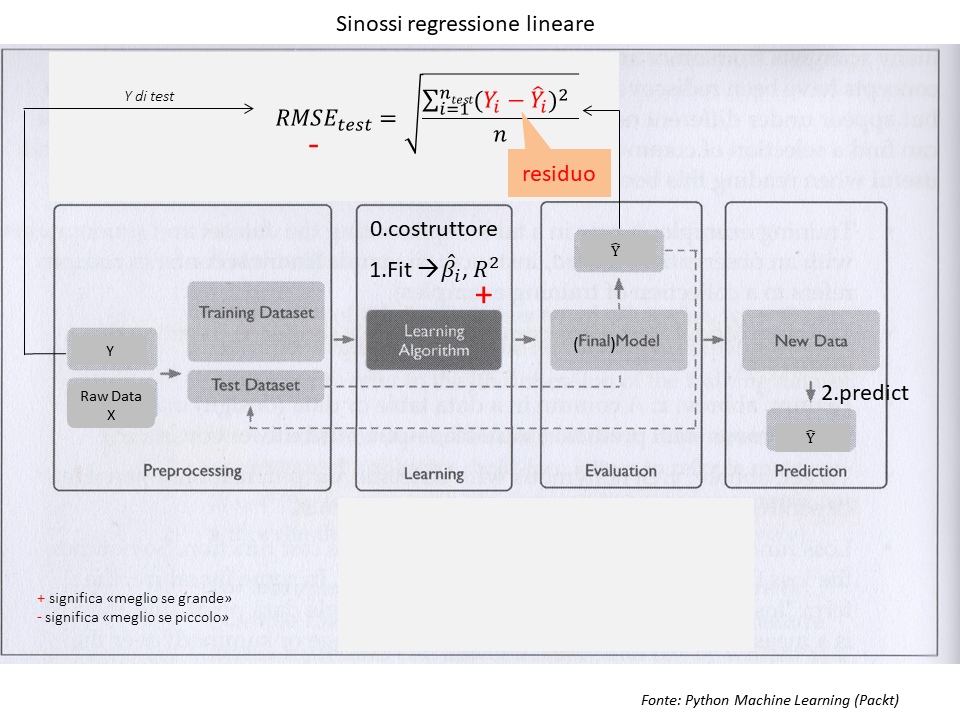

In [45]:
Image(filename='images_regressione/sinossi_regressione.png', width=1200)    # Il significato delle 6 variabili.

## Anova table nella regressione
Vedi corso DOE.

## La cross-validazione
[La CV in scikit-learn (molto ben descritta, su iris con svm)](https://scikit-learn.org/stable/modules/cross_validation.html)<br>
[Model Assessment vs Model Selection](images_regressione/MA_vs_MS.png)<br>
[K-fold CV](images_regressione/k_fold_CV.png)<br>
[MS combinato a MA](images/regressione/MS_MA.png)<br>


Vediamo inizialmente, per seguire l'esempio scikit-learn sopra citato, la K-fold CV applicata a *iris* (un problema di classificazione). Poi la applicheremo più propriamente in questo contesto a *ToyotaCorolla* (un problema di regressione).

In [105]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

X, y = datasets.load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

X_train.shape, y_train.shape

X_test.shape, y_test.shape

# fit del modello
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [106]:
predictions[0:5]

array([ 2.03707684,  0.88243733, -0.08648127,  1.76879782, -0.025324  ])

Text(0, 0.5, 'Predictions')

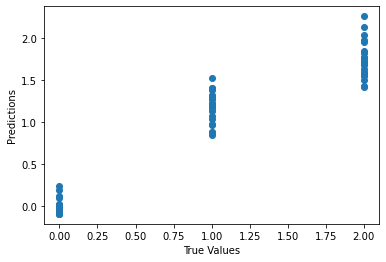

In [107]:
# il plot true/predicted
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [108]:
print ('Score:', model.score(X_test, y_test))  # 'score' è l'R2 della previsione

Score: 0.888564580463006


In [109]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,predictions, squared=False)
                                    # squared : boolean value, optional (default = True)
                                    # If True returns MSE value, if False returns RMSE value.

0.26066194895757533

Tutto ok?<br>
E se lo split non fosse casuale?<br>

In [110]:
# Import necessari:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [111]:
# Eseguiamo una CV 6-fold:
scores = cross_val_score(model, X, y, cv=6)
print ('Cross-validated scores:', scores)
                               # R2 per ogni fold.

Cross-validated scores: [0. 0. 0. 0. 0. 0.]


Come si vede, nell'ultimo fold lo score è migliorato. Non è un risultato spettacolare, ma non è male.

Per fare MS si usa la funzione GridSearchCV.

**Applichiamo ora la CV al dataset *Toyotacorolla***.<br>
The KFold function can be used to implement k-fold CV. Below we use k = 10, a common choice for k, on the *ToyotaCorolla* data set. We set a random seed and initialize a vector in which we will print the CV errors corresponding to the polynomial fits of orders one to ten.

In [112]:
# ripristiniamo X e y:
X = pd.get_dummies(car_df[predictors], drop_first=True) 
y = car_df[outcome]

In [113]:
# facciamo un fit quadratico ed uno cubico;
# 1. trasformiamo il dataframe con la classe 'PolynomialFeatures', che "Generates polynomial and interaction features." ed 
#    il suo metodo 'fit_transform' (Fits to data, then transform it);
# 2. vediamo i due MSE singoli:

from sklearn.preprocessing import PolynomialFeatures

# fit quadratico:
poly = PolynomialFeatures(degree=2)
X_2 = poly.fit_transform(X)

model = lm.fit(X_2, y)
print(mean_squared_error(y, model.predict(X_2)))

# fit cubico:
poly = PolynomialFeatures(degree=3)
X_3 = poly.fit_transform(X)

model = lm.fit(X_3, y)
print(mean_squared_error(y, model.predict(X_3 ))) 

3264366.0107771293
2168694.0108727613


Quindi, in sintesi, il fit migliore su questo dataset è quello lineare (MSE=1722446), poi quello cubico (MSE=2168694), infine quello quadratico (MSE=3264366)

In [114]:
# per avere una distribuzione dei due o più MSE si può usare la CV NESTED (vedi slide precedente)

from sklearn.model_selection import KFold
crossvalidation = KFold(n_splits=10, random_state=1, shuffle=True)    # K=10
                                                                      # cross-validation è il dataset suddiviso in k fold

for i in range(1,4):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(X)
    model = lm.fit(X_current, y)
    scores = cross_val_score(model, X_current, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)
    
    print("Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Degree-1 polynomial MSE: 3883000.6992096915, STD: 6288487.026814269
Degree-2 polynomial MSE: 11046968044.8503, STD: 33132350753.63557
Degree-3 polynomial MSE: 1.2322141941048632e+16, STD: 3.696641897072354e+16


Conclusione pratica --> la CV conferma che il modello lineare è il migliore per questo dataset.<br>
Se i risultati dello split training/test singolo e della CV differissero, quelli della CV sono più affidabili.

Un utile post su questo tema è [questo](http://www.science.smith.edu/~jcrouser/SDS293/labs/lab7-py.html).

## Visualizzazioni in 2D
Plot della **retta di regressione** e degli **intervalli di confidenza** per <u>un dato alpha</u> (possibile solo con 1 predittore)<br> 

Usiamo il package *seaborn*.
[Visualizing regression models](https://seaborn.pydata.org/tutorial/regression.html)

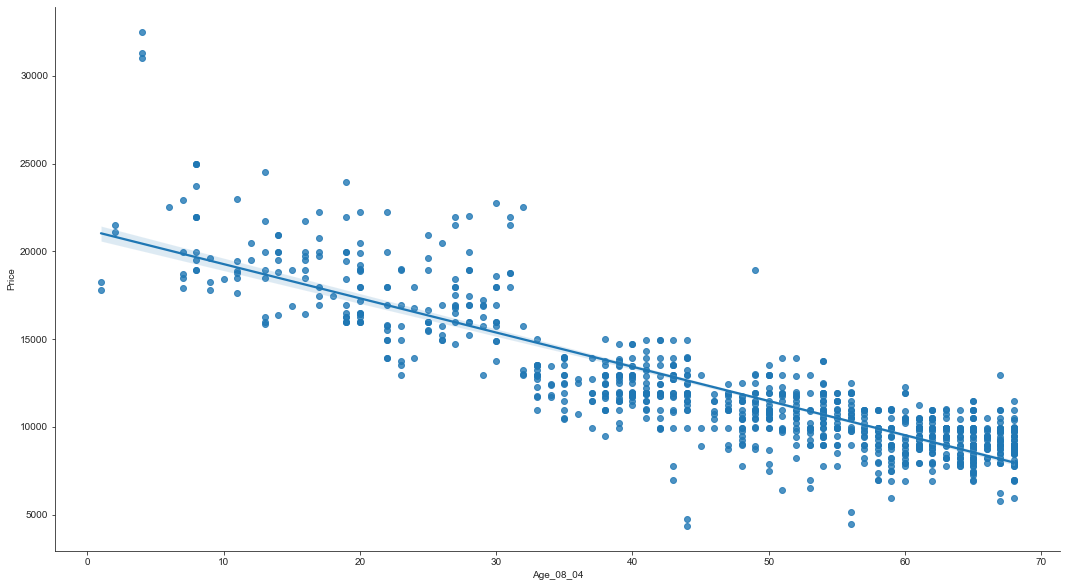

In [56]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)                              # so 31556424
sns.regplot(x="Age_08_04", y="Price",data=car_df,ci=90)  # Age_08_04 è uno dei predittori più significativi
sns.despine()

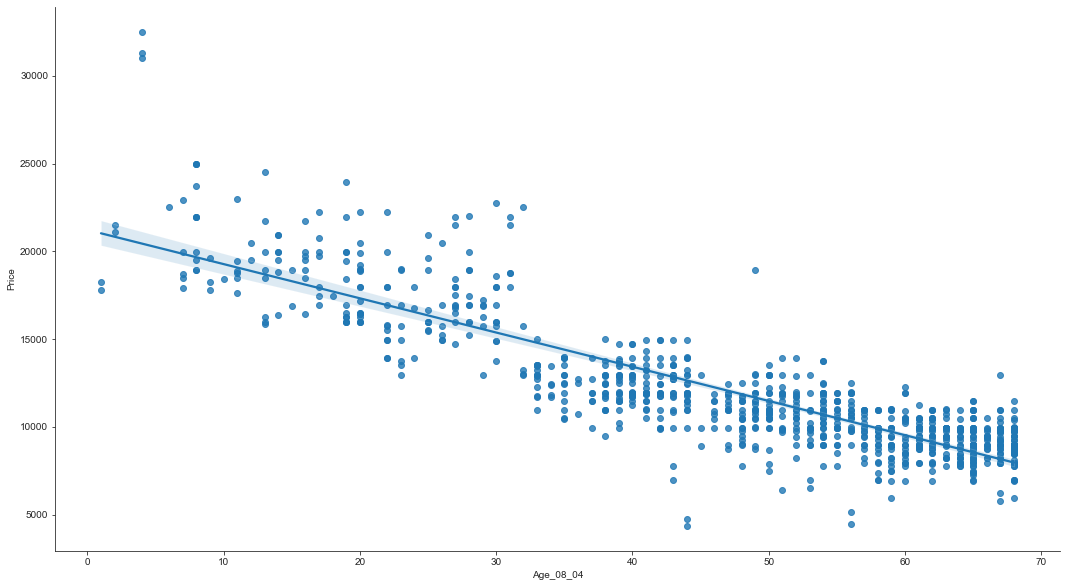

In [57]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
sns.regplot(x="Age_08_04", y="Price",data=car_df,ci=99)  # CI al 99%, più ampi.
sns.despine()

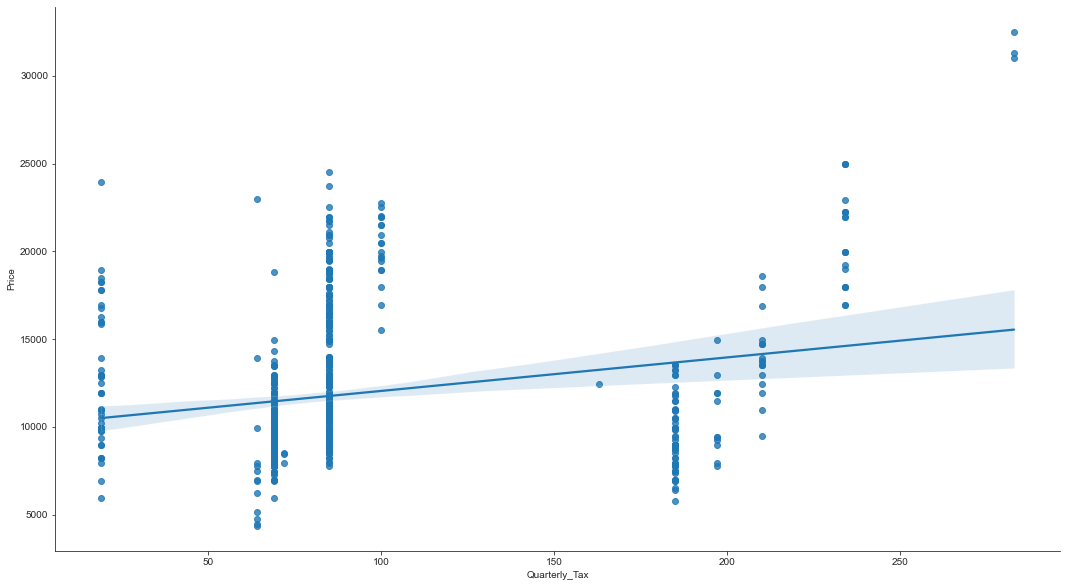

In [58]:
# CI un pò più ampi solo per alti valori del predittore (meno osservazioni disponibili).
# Proviamo ora con un predittore meno significativo. Dovremmo osservare CI più ampi.
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
sns.regplot(x="Quarterly_Tax", y="Price",data=car_df,ci=99)  
sns.despine()

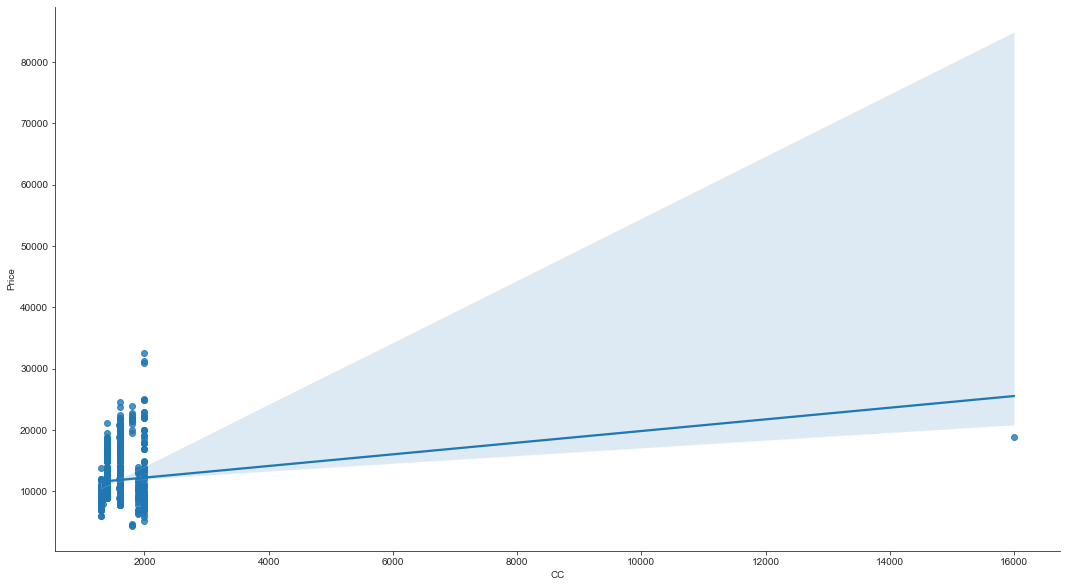

In [59]:
# Proviamo ora con un predittore NON significativo (cioè, con p-value > alpha (0.05) / #predittori)
# Dovremmo osservare un CI molto ampio. 
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
sns.regplot(x="CC", y="Price",data=car_df,ci=95)  
sns.despine()

## La verifica delle assunzioni
Le assunzioni per la <u>previsione</u> (SPESSO SOTTOVALUTATE):
* il fenomeno (la vera f) è **abbastanza lineare** (nel range di ooservazione dei predittori) --> **sì se R2 alto** 
* gli errori epsilon.i sono indipendenti dai valori del predittore i-esimo (in genere, sì)
* la media degli errori (residui) è 0
* le osservazioni sono indipendenti tra loro (independent sample, non necessariamente iid!)

Le ulteriori assunzioni per <u>l'inferenza</u> (che non sarebbe il nostro focus, perchè è un classico tema "statistico", non di ML) sono:
* gli errori sono distribuiti in modo gaussiano
* la varianza degli errori è costante (omoschedasticità)

**Se le assunzioni non sono soddisfatte (chiaramente) i risultati sono invalidati.**

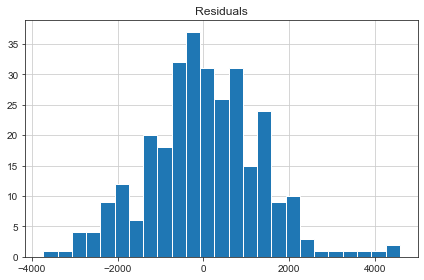

In [60]:
# Determiniamo i residui e vediamone l'istogramma. 

car_lm_pred = car_lm.predict(valid_X)
all_residuals = valid_y - car_lm_pred

ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)

plt.tight_layout()
plt.show()

# La media è 0?
# Sono gaussiani? 

In [61]:
print(all_residuals.mean())       # praticamente 0 (lo stesso valore riportato sopra dall'output di 'regressionSummary').

print(all_residuals.std(ddof=0))  # è il RMSE (a parte una differenza di arrotondamento), vedi output sopra di
                                  # 'regressionSummary'; 
                                  # ddof=1 (default) divide gli scarti per (N-1).

30.2966736640279
1312.0698907008366


<AxesSubplot:ylabel='Density'>

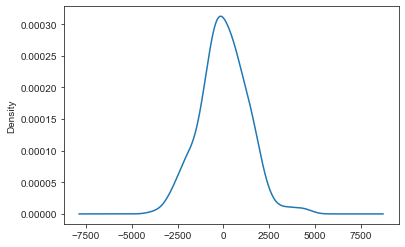

In [62]:
import matplotlib.pyplot as plt
plt.close("all")
all_residuals.plot(kind='kde') # la stima kernel --> molto simile ad una gaussiana!

Residuals should have relative constant variance


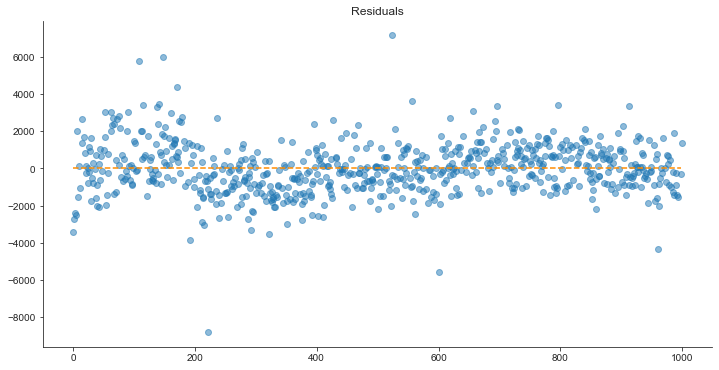

In [63]:
# ora vogliamo verificare la omoschedasticità dei residui (varianza costante).
# ci serviamo di alcune utility (da: https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/):

def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """  
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()  
    
homoscedasticity_assumption(car_lm,train_X, train_y)


**L'importanza dell'esame grafico dei dati**(le statistiche non sono tutto)<br><br>
[un caso limite: i
dataset di Ascombe](https://matplotlib.org/stable/gallery/specialty_plots/anscombe.html)<br>

In questo esempio (auto Toyota Corolla) le assunzioni, sia per la previsione che per l'inferenza, sembrano abbastanza soddisfatte.

## Le interazioni
Sono ulteriori possibili variabili che modellano l'interazione tra due predittori. L'interazione non è la correlazione.<br>
Sono individuabili con gli alberi, ad esempio in questo modo:
![](images_regressione/Interazioni.png)<br>
L'albero mostra che i due predittori X1 ed X2 **interagiscono** perchè, per X1 < k1, occorre conoscere il valore di X2 per determinare la regione.

## Rilevamento e gestione degli outlier

Con un dataset multivariato i boxplot e gli scatterplot sono utili ma non sufficienti. Gli outlier infatti possono essere tali solo come combinazione di variabili e pertanto non essere visualizzabili. 
Vediamo un esempio in 2D (visualizzabile!):

![esempio](images_regressione/mv_outlier.png)

*The red observation is not unusual in terms of its X1 value or its X2 value, but still falls outside the bulk of the data.*

E' necessario calcolare la **distanza di Mahalanobis** delle osservazioni dalla media campionaria.<br>

[la distanza di Mahalanobis](https://it.wikipedia.org/wiki/Distanza_di_Mahalanobis)<br><br>
[come calcolare la distanza di Mahalanobis in python](https://www.statology.org/mahalanobis-distance-python/)<br><br>
[le componenti della distanza di Mahalanobis (da Johnson & Wichern, cap.4)](images_regressione/MD_componenti.png)

In [55]:
# creiamo una funzione per calcolare la distanza di Mahalanobis (tra un'osservazione multi-variata x e il vettore delle medie
# campionarie):
def mahalanobis(x=None, data=None, cov=None):

    x_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

n = len(X.columns) # n_features di X (utile per dopo)

# creiamo una nuova colonna nel dataframe che contenga la Mahalanobis distance di ogni riga
X['mahalanobis'] = mahalanobis(x=X, data=X) # se ci sono correlazioni importanti tra i predittori/feature
# from scipy.spatial import distance
#X['euclidean'] = distance(X,X)              # se NON ci sono correlazioni importanti

#display first five rows of dataframe
X.head()

,Age_08_04,KM,HP,Met_Color,Automatic,CC,Doors,Quarterly_Tax,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol,mahalanobis
0,23,46986,90,1,0,2000,3,210,1165,1,0,15.004611
1,23,72937,90,1,0,2000,3,210,1165,1,0,13.734283
2,24,41711,90,1,0,2000,3,210,1165,1,0,15.468798
3,26,48000,90,0,0,2000,3,210,1165,1,0,16.570972
4,30,38500,90,0,0,2000,3,210,1170,1,0,17.321044


<u>Note sulla distanza di Mahalanobis</u>:
* la distanza di Mahalanobis tra due osservazioni multivariate x e y è definita come **sqrt [ (x - y)' S-1 (x-y) ]**, dove S è la matrice di covarianza di x e y. E' l'applicazione multivariata di (x-y)^2 / sigma. (Johnson & Wichern)
* per il rilevamento degli outlier, **y è la media campionaria**;
* la distanza di Mahalanobis tiene conto della **curvatura** dello spazio dei predittori operata dalle correlazioni;
* le curve di livello con la distanza di mahalanobis nello spazio dei predittori sono dunque <u>ellittiche</u> (in presenza di correlazione). ![esempio](images_regressione/Mahalanobis_distance.png)

In [56]:
from sklearn.neighbors import DistanceMetric
dist = DistanceMetric.get_metric('euclidean')   # la classe standard in scikit-learn per calcolare le distanze (di vari tipi)

In [57]:
# per capire se un valore (della distanza di mahalanobis) è statisticamente significativo dobbiamo calcolare il p-value.
# la distanza di mahalanobis segue una distribuzione chi-quadro (con gdl=n_features-1)

[la distribuzione chi-quadro](https://it.wikipedia.org/wiki/Distribuzione_chi_quadrato)

In [58]:
from scipy.stats import chi2
n = len(X.columns)
# calcoliamo il p-value per ogni mahalanobis distance 
X['p'] = 1 - chi2.cdf(X['mahalanobis'], n-1)  # il complemento a 1 della probabilità cumulata che, in una distribuzione
                                              # chi quadro con n-1 gdl, il valore sia minore/uguale di quello osservato.
                                              # cioè la probabilità che il valore sia maggiore di quello osservato. 
                                              # nella PDF esso corrisponde all'area a dx del valore osservato.
                                              # stack overflow 11725115.
                                              # [nb. il p.value è una probabilità, non è usato solo nei test di ipotesi.]
# visualizziamoli:
X.head()

,Age_08_04,KM,HP,Met_Color,Automatic,CC,Doors,Quarterly_Tax,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol,mahalanobis,p
0,23,46986,90,1,0,2000,3,210,1165,1,0,15.004611,0.182286
1,23,72937,90,1,0,2000,3,210,1165,1,0,13.734283,0.248047
2,24,41711,90,1,0,2000,3,210,1165,1,0,15.468798,0.162025
3,26,48000,90,0,0,2000,3,210,1165,1,0,16.570972,0.121222
4,30,38500,90,0,0,2000,3,210,1170,1,0,17.321044,0.098731


In [59]:
# ordinati per p.value:
X.sort_values(by = 'p', ascending = False) # in modo discendente

,Age_08_04,KM,HP,Met_Color,Automatic,CC,Doors,Quarterly_Tax,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol,mahalanobis,p
248,43,55539,110,1,0,1600,5,85,1085,0,1,1.656403,9.993850e-01
266,44,49332,110,1,0,1600,5,85,1080,0,1,1.684736,9.993328e-01
281,40,45886,110,1,0,1600,5,85,1080,0,1,1.807977,9.990652e-01
294,42,42560,110,1,0,1600,5,85,1080,0,1,1.808703,9.990634e-01
252,43,53773,110,1,0,1600,5,85,1075,0,1,1.813544,9.990515e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,55,150000,110,1,0,1600,3,72,1075,0,0,93.537932,3.330669e-15
221,44,74172,110,1,0,1600,5,163,1615,0,1,264.398755,0.000000e+00
991,58,43000,110,1,1,1600,4,72,1114,0,0,118.917219,0.000000e+00
960,66,50806,86,0,0,1300,3,19,1480,0,1,241.478873,0.000000e+00


In [60]:
# REGOLA GENERALE: un'osservazione è in genere considerata un outlier se il suo p.value del chi-quadro è < alpha (con alpha
# = 0.05 od anche 0.01 oppure ancora a 0.09)
print(X[X['p'] < 0.05]) # tutti i casi con p < 0.05 (sono 109, vedi cella successiva)

     Age_08_04     KM   HP  Met_Color  Automatic    CC  Doors  Quarterly_Tax  \
8           27  19700  192          0          0  1800      3            100   
10          25  31461  192          0          0  1800      3            100   
11          22  43610  192          0          0  1800      3            100   
12          25  32189  192          0          0  1800      3            100   
13          31  23000  192          1          0  1800      3            100   
..         ...    ...  ...        ...        ...   ...    ...            ...   
947         68  53000  110          1          1  1587      3             19   
956         58  51421  110          0          1  1600      5             85   
960         66  50806   86          0          0  1300      3             19   
985         61  45000  107          0          1  1600      3             85   
991         58  43000  110          1          1  1600      4             72   

     Weight  Fuel_Type_Diesel  Fuel_Typ

In [61]:
print(sum(X['p'] < 0.05)) # il numero di osservazioni con p.value < 0.05 (True vale 1). Tante!

109


<AxesSubplot:>

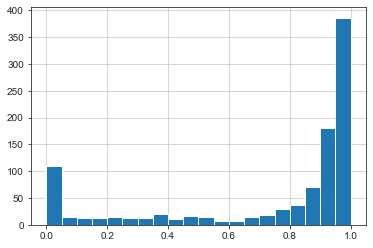

In [62]:
X['p'].hist(bins=20) # la conferma, ci sono molte osservazioni con p.value molto basso

<AxesSubplot:>

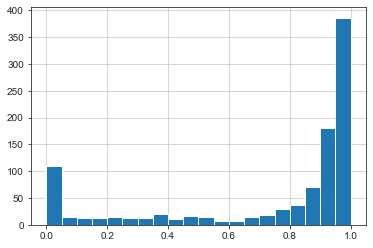

In [63]:
X['p'].hist(bins=20) # un numero maggiore di bin (classi di frequenza), rispetto al valore di default = 10, ci permette qui
                     # di individuare facilmente le righe con distanza significativamente alta dalla media campionaria (con
                     # threshold 0.05)

**Nota pratica**: qual è il numero *ottimale* di bin in un istogramma? <br>
Dipende dal problema applicativo, ma si possono dare alcune regolette molto generali:
* numero ottimale bin= 1 + 10/3 * log10(n), dove n è il numero di righe del dataset; quindi, nel nostro esempio si ha: 1+10/3 * log10(1000) = 11 (prof.ssa Vicario - PoliTO;
* da 5 a 20, mai bin vuoti (prof. Brandimarte - PoliTO)
  

In [64]:
# gestione degli outlier: spesso sono erroneamente tolti dal dataset! no!

# rimedi: trasformazione dei predittori oppure della Y, ad esempio con il logaritmo. 

# NON rimuovere l'outlier, come invece dicono impunemente acnhe alcuni testi od articoli, senza opportune verifiche.
# outlier è un errore in modo dimostrato? l'osservazione appartiene ad un'altra popolazione erroneamete campionata? -->
# se sì, allora osso rimuovere.
# MA invece: l'outlier può far parte del proceso generativo dei dati. E come tale ci dà delle informazioni essenziali.

AxesSubplot(0.125,0.125;0.775x0.755)


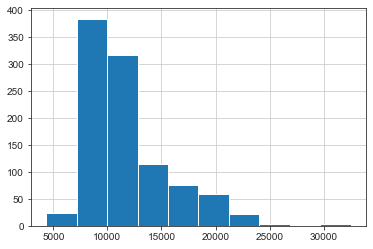

In [65]:
print(car_df['Price'].hist())           # distribuzione assimmetrica (certamente NON gaussiana) e con outlier.    
                                        # xxx.hist --> fornisce la lista dei valori anzichè l'istogramma.

AxesSubplot(0.125,0.125;0.775x0.755)


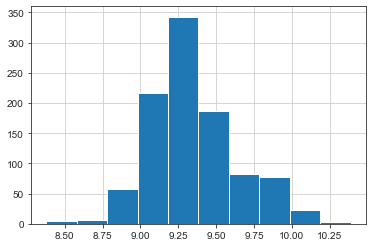

In [66]:
print(np.log(car_df['Price']).hist())       # distribuzione più simmetrica e compatta;
                                            # ricordarsi, dopo la modellazione, di retro-trasformare la variabile (qui, con
                                            # la funzione 'exp')

<u>Ci sono vari tipi di outlier</u>. In senso stretto:
* gli outlier sono osservazioni con **residuo (Yi - Yi-hat) alto**;
* gli outlier nello spazio dei predittori (come inteso prima) sono detti **leverage**;
* le osservazioni **influential** sono quelle con alto impatto sulla qualità del fit: gli influential sono outlier o leverage; il contrario non necessariamente;
* le osservazioni influential si rilevano con la **distanza di Cook**. [Tutorial](https://www.statology.org/cooks-distance-python/) [Documentazione scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html)

## La selezione manuale dei predittori (aka, *feature selection*)
Esistono due modi.

### Eliminazione del pvalue più alto

La tecnica classica è iterativa e consiste nell'**eliminare un predittore per volta**, quello con il p.value più alto, e poi **rifittare** il modello. Il refit è necessario perchè, per le correlazioni/dipendenze tra predittori, l'eliminazione di un predittore X può comportare che, nell'iterazione successiva, il predittore Y abbia un p.value significativo che prima non aveva!.<br>
Il grande vantaggio di questa tecnica classica è che si acquisisce una migliore **comprensione** degli effetti sulla risposta dei vari predittori. Cosa non possibile se si usano i metodi automatici di selezione (dei predittori).

In [115]:
import numpy as np
import statsmodels.api as sm

# per sicurezza ricreiamo i dati:
predictors = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'CC', 
              'Doors', 'Quarterly_Tax', 'Weight']
outcome = 'Price' 
predictors.remove("Fuel_Type")   # togliamo il predittore categorico (per semplificare il modello e non avere le DV)
X = car_df[predictors]
y = car_df[outcome]
Z = sm.add_constant(X)   

# il fit:
results = sm.OLS(y,Z).fit()                              
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     692.6
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:24:04   Log-Likelihood:                -8654.0
No. Observations:                1000   AIC:                         1.733e+04
Df Residuals:                     990   BIC:                         1.738e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1769.4768   1259.785     -1.405

C:\Users\Utente\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


'Met_Color' ha il pvalue più alto (0.728). Lo eliminiamo dal modello e rifittiamo il modello.

In [11]:
# cella NON-RIESEGUIBILE (a causa della remove dalla lista)
predictors.remove("Met_Color")
X = car_df[predictors]
Z = sm.add_constant(X)  
results = sm.OLS(y,Z).fit()                              
print(results.summary())   

ValueError: list.remove(x): x not in list

'Doors' ha il pvalue più alto (0.718). Lo eliminiamo dal modello e rifittiamo il modello.

In [116]:
# cella NON-RIESEGUIBILE (a causa della remove dalla lista)
predictors.remove("Doors")
X = car_df[predictors]
Z = sm.add_constant(X)  
results = sm.OLS(y,Z).fit()                              
print(results.summary())   

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     779.8
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:24:34   Log-Likelihood:                -8654.1
No. Observations:                1000   AIC:                         1.733e+04
Df Residuals:                     991   BIC:                         1.737e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1733.7447   1255.890     -1.380

C:\Users\Utente\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


'CC' ha il pvalue più alto (0.413). Lo eliminiamo dal modello e rifittiamo il modello.

In [117]:
# cella NON-RIESEGUIBILE (a causa della remove dalla lista)
predictors.remove("CC")
X = car_df[predictors]
Z = sm.add_constant(X)  
results = sm.OLS(y,Z).fit()                              
print(results.summary())   

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     891.4
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:25:32   Log-Likelihood:                -8654.4
No. Observations:                1000   AIC:                         1.732e+04
Df Residuals:                     992   BIC:                         1.736e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1700.7648   1255.058     -1.355

C:\Users\Utente\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


'Automatic' ha il pvalue più alto (0.129). Lo eliminiamo dal modello e rifittiamo il modello.

In [118]:
# cella NON-RIESEGUIBILE (a causa della remove dalla lista)
predictors.remove("Automatic")
X = car_df[predictors]
Z = sm.add_constant(X)  
results = sm.OLS(y,Z).fit()                              
print(results.summary())   

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1038.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:25:45   Log-Likelihood:                -8655.6
No. Observations:                1000   AIC:                         1.733e+04
Df Residuals:                     993   BIC:                         1.736e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1970.2997   1243.429     -1.585

C:\Users\Utente\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Come ultimo passo è bene togliere l'intercetta (non significativa); cioè non aggiungiamo al modello la costante.

In [119]:
results = sm.OLS(y,X).fit()          # fit su X (e non su Z, come prima)                    
print(results.summary())   

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.308e+04
Date:                Mon, 28 Nov 2022   Prob (F-statistic):                        0.00
Time:                        11:25:46   Log-Likelihood:                         -8656.8
No. Observations:                1000   AIC:                                  1.733e+04
Df Residuals:                     994   BIC:                                  1.736e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Il **modello finale**: tutti i pvalue sogno ora <u>significativi</u>.<br>

Si noti che abbiamo eliminato in sequenza: 'Met_Color', 'Doors', 'CC', 'Automatic', 'const'. Corrisponde quasi esattamente all'ordine decrescente dei p.value nel modello iniziale di questa sezione (quello con tutti i 9 predittori). Ma non sempre è così, dunque **non si possono eliminare dal modello tutti i predittori non-significativi in un colpo solo!** <u>Bisogna procedere iterativamente</u>.

### Test degli extra sum of squares
Vedi ISLR, pp. 76-77

## La selezione automatica dei predittori
*We are not limited to variables that we know are predictive; sometimes a useful predictor emerges in an unexpected way.* (DMforBA, § 11.6).<br>
La selezione automatica è necessaria se i predittori sono troppi o se sono (molto) correlati.                  

**Ricerca esaustiva**<br>
Anche detta "best subset selection".<br>
Confronta tutti i possibili 2^p modelli. [qui, p=11 --> 2^11=2048]<br>
In scikit-learn non è implementata (a differenza di R), occorre scrivere una funzione ad hoc.<br>
Si riporta nel seguito la funzione del libro *Data Mining bor Business Analytics*. Un'alternativa è [questa](https://stackoverflow.com/questions/22956938/exhaustively-feature-selection-in-scikit-learn).<br>
In questo esempio, attendere una decina di secondi circa.

In [120]:
# definiamo prima due comode funzioni:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_X[variables])
    return -adjusted_r2_score(train_y, pred_y, model) # col segno meno perchè lo score è ottimizzato per essere 
                                                      # il più basso possibile.

# e poi eseguiamo la ricerca esaustiva di scikit-learn:
allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)

data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
pd.set_option('display.width', 100)
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))
pd.reset_option('display.width')

     n     r2adj           AIC  Age_08_04  Automatic     CC  Doors  Fuel_Type_Diesel  \
0    1  0.764209  12491.031175       True      False  False  False             False   
1    2  0.802708  12367.243886       True      False  False  False             False   
2    3  0.833807  12248.162908       True      False  False  False             False   
3    4  0.850889  12173.234933       True      False  False  False             False   
4    5  0.853866  12160.110930       True      False  False  False             False   
5    6  0.859538  12133.390490       True      False  False  False             False   
6    7  0.860218  12130.982578       True      False  False  False              True   
7    8  0.860727  12129.417639       True       True  False  False              True   
8    9  0.860812  12129.977224       True       True  False   True              True   
9   10  0.860627  12131.891958       True       True  False   True              True   
10  11  0.860424  12133.891845  

Interpretazione dell'output precedente:<br>
* ogni riga riporta il miglior modello con quel numero di predittori;
* il modello con R2 aggiustato maggiore è con p=9; con p>9, R2 aggiustato diminuisce, seppur leggermente;
* in questo esempio, se un predittore "entra" nel modello non ne esce più; ma, in generale, non è sempre così.

**Backward selection**<br>
Sconsigliata fortemente dal PoliMI (prof. Secchi) perchè senza appoggio teorico, a differenza della forward selection.<br>
Tuttavia spesso utilizzata ed esemplificata in molti ottimi testi.

In [25]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Age_08_04, KM, HP, Met_Color, Automatic, CC, Doors, Quarterly_Tax, Weight, Fuel_Type_Diesel, Fuel_Type_Petrol
Start: score=13855.01
Step: score=13853.01, remove CC
Step: score=13851.12, remove Met_Color
Step: score=13851.12, remove None
['Age_08_04', 'KM', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']


In [69]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables])) # --> test RMSE costante (con tutti i pred. era 1285)


Regression statistics

                      Mean Error (ME) : -26.7290
       Root Mean Squared Error (RMSE) : 1286.0725
            Mean Absolute Error (MAE) : 990.8614
          Mean Percentage Error (MPE) : -1.8099
Mean Absolute Percentage Error (MAPE) : 8.9708


**Forward selection**

In [121]:
# Il modello iniziale è il modello nullo (solo l'intercetta), qui chiamato "constant model".  

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Age_08_04, KM, HP, Met_Color, Automatic, CC, Doors, Quarterly_Tax, Weight, Fuel_Type_Diesel, Fuel_Type_Petrol
Start: score=13501.40, constant
Step: score=12491.03, add Age_08_04
Step: score=12367.24, add HP
Step: score=12248.16, add Weight
Step: score=12173.23, add KM
Step: score=12160.11, add Quarterly_Tax
Step: score=12133.39, add Fuel_Type_Petrol
Step: score=12130.98, add Fuel_Type_Diesel
Step: score=12129.42, add Automatic
Step: score=12129.42, add None
['Age_08_04', 'HP', 'Weight', 'KM', 'Quarterly_Tax', 'Fuel_Type_Petrol', 'Fuel_Type_Diesel', 'Automatic']


In [71]:
valid_X # in più, nel dataframe originale ma non compresi invece nel 'best model', ci sono anche le colonne 'Met_Color, CC'

,Age_08_04,KM,HP,Met_Color,Automatic,CC,Doors,Quarterly_Tax,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
507,55,54900,97,1,0,1400,5,85,1060,0,1
818,62,70500,110,1,0,1600,5,69,1035,0,1
452,49,73175,97,1,0,1400,3,69,1030,0,1
368,37,21500,110,1,0,1600,5,69,1030,0,1
242,43,58277,110,1,0,1600,3,69,1045,0,1
...,...,...,...,...,...,...,...,...,...,...,...
430,50,82805,110,1,0,1600,3,69,1040,0,1
874,65,62225,110,1,0,1600,3,69,1050,0,1
550,49,41710,110,0,0,1600,3,69,1040,0,1
608,65,176184,72,1,0,2000,3,185,1115,1,0


In [72]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables])) # --> test RMSE identico alla backward
                                                                        #     perchè i predittori selezionati solo gli stessi


Regression statistics

                      Mean Error (ME) : -26.7290
       Root Mean Squared Error (RMSE) : 1286.0725
            Mean Absolute Error (MAE) : 990.8614
          Mean Percentage Error (MPE) : -1.8099
Mean Absolute Percentage Error (MAPE) : 8.9708


In [73]:
# ed ora prendiamo solo i primi 3 predittori (per importanza): ATTESA: RMSE sia di pochissimo superiore a 1286.07.
best_variables_red = best_variables[:3]
regressionSummary(valid_y, best_model.predict(valid_X[best_variables_red])) # --> test RMSE identico alla backward


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 9 is different from 3)

In [74]:
# infine, vediamo la step-wise selection, che un approccio "ibrido", cioè in parte forward ed in parte backward
# (Draper & Smith, p. 335; ISLR, p. 210)
best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Age_08_04, KM, HP, Met_Color, Automatic, CC, Doors, Quarterly_Tax, Weight, Fuel_Type_Diesel, Fuel_Type_Petrol
Start: score=15437.94, constant
Step: score=14302.93, add Age_08_04
Step: score=14161.29, add HP
Step: score=13994.61, add Weight
Step: score=13897.07, add KM
Step: score=13884.64, add Quarterly_Tax
Step: score=13853.71, add Fuel_Type_Petrol
Step: score=13852.27, add Fuel_Type_Diesel
Step: score=13851.45, add Automatic
Step: score=13851.12, add Doors
Step: score=13851.12, unchanged None
['Age_08_04', 'HP', 'Weight', 'KM', 'Quarterly_Tax', 'Fuel_Type_Petrol', 'Fuel_Type_Diesel', 'Automatic', 'Doors']


In [75]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables])) # --> test RMSE ancora identico a prima
                                                                        #     perchè i predittori selezionati solo gli stessi


Regression statistics

                      Mean Error (ME) : -26.7290
       Root Mean Squared Error (RMSE) : 1286.0725
            Mean Absolute Error (MAE) : 990.8614
          Mean Percentage Error (MPE) : -1.8099
Mean Absolute Percentage Error (MAPE) : 8.9708


[the piacenza score](images_regressione/Piacenza_score.png)

## Ridge Regression
[da Wikipedia EN]
*The bias–variance decomposition forms the conceptual basis for regression regularization methods such as Lasso and ridge 
regression. Regularization methods introduce bias into the regression solution that can reduce variance considerably relative
to the ordinary least squares (OLS) solution. Although the OLS solution provides non-biased regression estimates, the lower 
variance solutions produced by regularization techniques provide superior MSE performance.*

Se il fenomeno è <u>lineare</u>, OLS ha bias basso ma può avere varianza alta. Per questo motivo sono stati introdotti i metodi di **shrinkage**.

RR è stata introdotta negli anni '70, ma si è diffusa successivamente.

"Ridge" : cresta/crinale, riferito al cammino della soluzione lungo le curve di livello.

RR fa lo **shrinkage** di tutti i coefficienti (non dell'intercetta) verso zero tramite la **penalty** introdotta nella funzione obiettivo (*lambda x Somma.i beta.i-hat^2*)

La penalty della RR è <u>una norma 2</u>, è la distanza del vettore beta-hat (le stime dei coefficienti) dal vettore 0.

[Da un punto di vista algebrico, Z'Z + lambda I è sempre invertibile --> quindi c'è sempre una unica soluzione alle equazioni normali.]

Lambda controlla l'importanza relativa dei due addendi nella funzione obiettivo.

Al crescere di lambda, tutti i coefficienti diminuiscono verso zero (anche se occasionalmente un singolo può crescere).
I metodi di shrinkage (aka, **regolarizzazione o penalizzazione**) cioè, tramite un lambda crescente, possono forzare i coefficienti (stimati) verso zero: <u>si può dimostrare che in questo modo la varianza del fit diminuisce, anche di molto</u>.

RR fornisce dunque <u>un set di modelli</u> (uno per ogni valore di lambda); poi si usa la **Cross-Validazione** per scegliere il miglior valore di lamda e quindi un modello (è la Model Selection). Per definizione, il miglior valore di lambda è quello il cui errore di test è minore.

I possibili valori di lambda costituiscono la griglia di ricerca della Model Selection.

Dopo aver trovato il miglior lambda, refit RR sul dataset completo, come sempre.

Il **vantaggio della RR**, rispetto ad OLS, è <u>radicato nel trade-off bias-varianza</u>. **Lambda 0 = OLS** --> varianza alta ma bias piccolo. Al crescere di lambda, la flessibilità della RR diminuisce (e la varianza diminuisce) ed il bias aumenta. Poichè i beta-i stimati tendono a zero, ci sono <u>meno parametri nel modello</u>.
Come sempre, non si può dire nello *specifico caso* se sia meglio il bias basso o la varianza bassa. Dipende da come essi interagiscono.

RR funziona molto bene in presenza di multicollinearita' tra predittori (che comporta varianza alta).
[Varianza alta vuol dire che, al variare del training set, anche di poco, le stime dei coefficienti possono variare di molto.] 

[Se c'è <u>abbastanza</u> MC, OLS non va bene, e d'altra parte non c'è sufficiente correlazione per la PCA --> variable selection/shrinkage.]

**Se c'è <u>molta</u> multi-collinearità tra predittori e n > p, RR è certamente il meglior metodo di previsione.**

Se invece il bias basso è importante (ad esempio perchè l'inferenza è più importante della previsione), non si deve scegliere RR.

RR richiede la **standardizzazione dei dati**, perché, a differenza di OLS, <u>non</u> è scale-invariant.


RR non è computazionalmente peggiore di OLS. Infatti il calcolo di <u>tutti</u> i modelli (al variare di lambda) è circa uguale computazionalmente al calcolo dei coefficienti con OLS.

In [76]:
# ridge = Ridge(normalize=True, alpha=1)
# ridge.fit(train_X, train_y)
#regressionSummary(valid_y, ridge.predict(valid_X))

ridge_cv = RidgeCV(normalize=True, cv=5)
ridge_cv.fit(train_X, train_y)
regressionSummary(valid_y, ridge_cv.predict(valid_X))
print('Ridge-CV chosen regularization: ', ridge_cv.alpha_)
print(ridge_cv.coef_)


Regression statistics

                      Mean Error (ME) : -18.0201
       Root Mean Squared Error (RMSE) : 1324.8704
            Mean Absolute Error (MAE) : 1016.9768
          Mean Percentage Error (MPE) : -2.1267
Mean Absolute Percentage Error (MAPE) : 9.1496
Ridge-CV chosen regularization:  0.1
[-1.18685280e+02 -2.16300468e-02  3.48256481e+01  6.44898767e+01
  2.96238628e+02  2.80109552e-02 -2.56532730e+01  1.06105328e+01
  1.58933833e+01  1.10422329e+02  1.05409227e+03]


Test RMSE è maggiore che con OLS. Probabilmente il dataset non è abbastanza correlato per trarre vantaggi dalla Ridge Regression.

## Lasso
* Popolarizzato da Robert Tibshirani nel 1996;
* RR spinge  tutti i coefficienti verso 0,  nessuno esattamente 0, a meno di lambda molto alto (è un suo svantaggio). Lasso invece ne forza qualcuno a 0, usando una norma L1: *lambda x Somma.i |beta.i-hat|*;
* Quando si raggiunge un vertice (vedi figura più avanti), allora beta.i-hat =0. Non c'è decrescita monotonica come in RR;
* Lasso fa quindi anche selezione variabili, a differenza di RR;
* Non c'è "resurrezione" delle variabili;
* Lasso è simile a best subset selection ma computazionalmente più veloce (la' ci sono 2^p modelli).

In [77]:
# lasso = Lasso(normalize=True, alpha=1)
# lasso.fit(train_X, train_y)
# regressionSummary(valid_y, lasso.predict(valid_X))
lasso_cv = LassoCV(normalize=True, cv=5)
lasso_cv.fit(train_X, train_y)
regressionSummary(valid_y, lasso_cv.predict(valid_X))           # test RMSE peggiore che con RR
print('Lasso-CV chosen regularization: ', lasso_cv.alpha_)
print(lasso_cv.coef_)


Regression statistics

                      Mean Error (ME) : -13.7382
       Root Mean Squared Error (RMSE) : 1342.1153
            Mean Absolute Error (MAE) : 1007.8808
          Mean Percentage Error (MPE) : -2.0072
Mean Absolute Percentage Error (MAPE) : 9.1985
Lasso-CV chosen regularization:  2.6616822966887925
[-1.32844465e+02 -1.85481024e-02  3.51548435e+01  0.00000000e+00
  3.94660482e+01  0.00000000e+00 -0.00000000e+00  4.75530432e+00
  1.52053082e+01 -0.00000000e+00  3.34086302e+02]


In [78]:
# confronto dei coefficienti ottenuti con i tre metodi: si vede come RR faccia shrinkage di (quasi) tutti i coefficienti
# (rispetto ad OLS), e Lasso faccia effettivamente variable selection (alcuni coefficienti sono 0).
pd.DataFrame({'features': train_X.columns, 'OLS': car_lm.coef_,'ridgeCV': ridge_cv.coef_,'lassoCV': lasso_cv.coef_})

,features,OLS,ridgeCV,lassoCV
0,Age_08_04,-134.684980,-118.685280,-132.844465
1,KM,-0.017728,-0.021630,-0.018548
2,HP,35.530702,34.825648,35.154843
3,Met_Color,34.884794,64.489877,0.000000
4,Automatic,366.651443,296.238628,39.466048
5,CC,-0.007584,0.028011,0.000000
6,Doors,-84.523570,-25.653273,-0.000000
7,Quarterly_Tax,15.092210,10.610533,4.755304
8,Weight,15.923794,15.893383,15.205308
9,Fuel_Type_Diesel,872.755989,110.422329,-0.000000


In [79]:
# terminiamo con un fit OLS sul dataset totale con i predittori selezionati:

import statsmodels.api as sm    
from scipy import stats

full = sm.OLS(y, X[best_variables])                  
full2 = full.fit()
print(full2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              9003.
Date:                Thu, 24 Mar 2022   Prob (F-statistic):                        0.00
Time:                        22:50:54   Log-Likelihood:                         -8639.5
No. Observations:                1000   AIC:                                  1.730e+04
Df Residuals:                     991   BIC:                                  1.734e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

## Lasso applicato al [dataset Hitters](https://www.kaggle.com/floser/hitters?select=Hitters.csv)

In [3]:
hitters_df = pd.read_csv('data_regressione/Hitters.csv')
hitters_df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [96]:
hitters_df.dropna(inplace=True) # altrimenti i MV impediscono il fit

In [97]:
# chiamiamo X,y e predictors col suffisso '_new' per non sovrascrivere gli analoghi di 'Toyota Corolla'
predictors_new = ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'NewLeague']
X_new = pd.get_dummies(hitters_df[predictors_new], drop_first=True) # 'drop_first': "Whether to get k-1 dummies out of k categorical levels 
                                                                    # by removing the first level".
y_new = hitters_df['Salary']                                        # la risposta

In [98]:
print(np.linalg.cond(X_new)) # il condition number della matrice X

20598.540858381934


In [99]:
train_X_new, valid_X_new, train_y_new, valid_y_new = train_test_split(X_new, y_new, test_size=0.2, random_state=1)
hitters_lm = LinearRegression()             # la regressione OLS
hitters_lm.fit(train_X_new, train_y_new)

LinearRegression()

In [100]:
# la stampa dei coefficienti beta.i stimati (con il metodo OLS), cioè dei parametri in senso statistico.
print('intercept ', hitters_lm.intercept_,'\n')                                 # beta.0 stimato
print(pd.DataFrame({'Predictor': X_new.columns, 'coefficient': hitters_lm.coef_}))  # beta.1 - beta.p stimati (p= numero dei predittori)

intercept  156.66310964408854 

      Predictor  coefficient
0         AtBat    -1.876566
1          Hits     6.589515
2         HmRun     0.254613
3          Runs    -0.445740
4           RBI     0.038896
5         Walks     4.562839
6         Years     6.146329
7        CAtBat    -0.356370
8         CHits     0.989676
9        CHmRun     1.590335
10        CRuns     0.765803
11         CRBI     0.267375
12       CWalks    -0.445449
13      PutOuts     0.287136
14      Assists     0.142581
15       Errors     1.654931
16     League_N    51.957325
17   Division_W  -116.575264
18  NewLeague_N    -3.259057


In [101]:
# le prestazioni predittive sul test set 
hitters_lm_pred = hitters_lm.predict(valid_X_new)
regressionSummary(valid_y_new, hitters_lm_pred)


Regression statistics

                      Mean Error (ME) : 40.0018
       Root Mean Squared Error (RMSE) : 365.5065
            Mean Absolute Error (MAE) : 268.3208
          Mean Percentage Error (MPE) : -57.6571
Mean Absolute Percentage Error (MAPE) : 90.0503


In [102]:
lasso_cv = LassoCV(normalize=True, cv=10)
lasso_cv.fit(train_X_new, train_y_new)
regressionSummary(valid_y_new, lasso_cv.predict(valid_X_new))           # test RMSE migliore che con OLS
                                                                        # (nello script R PoliMI era migliore ancora).
print('Lasso-CV chosen regularization: ', lasso_cv.alpha_)
print(lasso_cv.coef_)


Regression statistics

                      Mean Error (ME) : 23.3398
       Root Mean Squared Error (RMSE) : 353.5202
            Mean Absolute Error (MAE) : 257.6813
          Mean Percentage Error (MPE) : -61.0604
Mean Absolute Percentage Error (MAPE) : 88.4544
Lasso-CV chosen regularization:  0.24258426098354494
[  -1.55560078    6.11443501   -0.            0.            0.
    3.66550446   -5.71155653   -0.            0.            1.00625471
    0.42984398    0.27192048   -0.33867657    0.29255909    0.
    1.23169586   28.51618277 -113.89220705   11.22413725]


## RR vs Lasso
RR e lasso vanno bene per la previsione, non per spiegare (meglio ols che è unbiased perché senza penalty.).<br>
Per la previsione Lasso è meglio di RR, in genere, se pochi coefficienti veri sono diversi da zero, e RR è meglio di Lasso se la vera retta è funzione di molti predittori, tutti con coefficienti di grandezza simile.

[Le tre funzioni obiettivo a confronto](images_regressione/Funzioni_obiettivo.png)

<br><br>**Come operano i vincoli di RR e Lasso**:<br><br>
La soluzione del problema vincolato è nel **punto di incontro** delle curve di livello di RSS (crescenti) con la regione del vincolo.Nel caso di Lasso, tale punto è spesso su un asse od insiemi di assi.
![](RR_Lasso_LC.png)

## Bottom-line sulla *Variable Selection*
**No ad automatismi eccessivi**. La selezione *automatica* delle variabili, con uno dei vari metodi ora visti, va bene come prima indicazione, ad esempio se non si hanno conoscenze su quel fenomeno e quei predittori. Ma, se lo sperimentatore ritiene, in base a sue conoscenze pregresse del fenomeno sotto studio o di altre evidenze, che un certo predittore vada comunque messo nel modello, o vada invece escluso, tale sua conoscenza **prevale** su qualsiasi variable selection automatica. Le tecniche di variable selection, inclusi RR e Lasso, sono **utili aiuti** allo sperimentatore, non lo sostituiscono.

## La regressione polinomiale

RR e Lasso non sono i modelli regressivi con la massima flessibilità.<br>
La regressione polinomiale e le spline permettono fit ancora più flessibili. Vediamo la prima.


### Un esempio giocattolo

In [62]:
# Il dataset fittizio di prova, costruito ad hoc:
X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])[:, np.newaxis]

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])

In [63]:
print(X)
print(y)

[[258.]
 [270.]
 [294.]
 [320.]
 [342.]
 [368.]
 [396.]
 [446.]
 [480.]
 [586.]]
[236.4 234.4 252.8 298.6 314.2 342.2 360.8 368.  391.2 390.8]


In [64]:
X.dtype # ---> è memorizzato nel computer come mantissa ed esponente

dtype('float64')

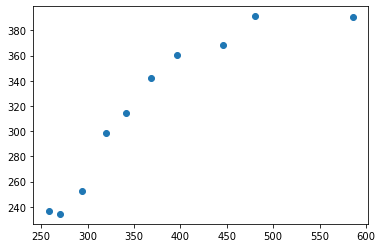

In [65]:
# plottiamo i risultati
plt.scatter(X, y, label='osservazioni di training')

In [71]:
from sklearn.preprocessing import PolynomialFeatures # è una classe TRANSFORMER, per aggiungere ad un dataset  
                                                     # i termini di ordine d.

quadratic = PolynomialFeatures(degree=2)             # aggiungiamo al dataset un termine di ordine d=2.
                                                     # questo è il solito metodo costruttore
    
X_quad = quadratic.fit_transform(X)                  # --> 3 colonne (1,X,X^2)

In [72]:
print(X_quad)

[[1.00000e+00 2.58000e+02 6.65640e+04]
 [1.00000e+00 2.70000e+02 7.29000e+04]
 [1.00000e+00 2.94000e+02 8.64360e+04]
 [1.00000e+00 3.20000e+02 1.02400e+05]
 [1.00000e+00 3.42000e+02 1.16964e+05]
 [1.00000e+00 3.68000e+02 1.35424e+05]
 [1.00000e+00 3.96000e+02 1.56816e+05]
 [1.00000e+00 4.46000e+02 1.98916e+05]
 [1.00000e+00 4.80000e+02 2.30400e+05]
 [1.00000e+00 5.86000e+02 3.43396e+05]]


In [73]:
# fittiamo ora un semplice modello LINEARE per confronto
lr = LinearRegression()                         # costruttore
lr.fit(X, y)                                    # il fit
X_fit = np.arange(250, 600, 10)[:, np.newaxis]  # i nuovi dati da prevedere
y_lin_fit = lr.predict(X_fit)                   # le previsioni

In [74]:
# fittiamo ora un modello POLINOMIALE di grado 2 (con i predittori prima trasformati)
pr = LinearRegression()                         # il costruttore
pr.fit(X_quad, y)                               # il fit è ora fatto con le X_quad
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit)) # le previsioni

In [75]:
# fittiamo ora un modello POLINOMIALE di grado 3 (e prima trasformando i predittori con l'aggiunta dei termini cubici.
cubic = PolynomialFeatures(degree=3)                 # aggiungiamo al dataset un termine di ordine d=3.
                                                     # questo è il solito metodo costruttore
    
X_cub = quadratic.fit_transform(X)                   # --> 3 colonne (1,X,X^2,X^3)

pr = LinearRegression()                              # il costruttore
pr.fit(X_cub, y)                                     # il fit è ora fatto con le X_quad
y_cub_fit = pr.predict(quadratic.fit_transform(X_fit)) # le previsioni

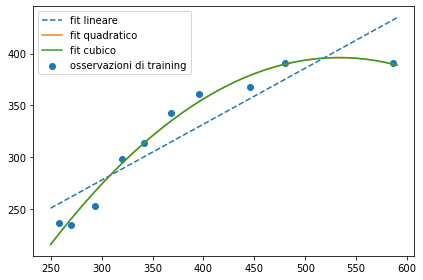

In [76]:
# plottiamo i risultati
plt.scatter(X, y, label='osservazioni di training')
plt.plot(X_fit, y_lin_fit, label='fit lineare', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='fit quadratico')
plt.plot(X_fit, y_cub_fit, label='fit cubico')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [63]:
# Si nota come il fit polinomiale (quadratico) cattura la relazione tra i predittori e la risposta molto meglio del fit lineare.

In [77]:
# Per verifica dell'impressione visiva, calcoliamo MSE di training ed R2:

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

print('Training MSE lineare: %.3f, quadratico: %.3f' % (
        mean_squared_error(y, y_lin_pred),
        mean_squared_error(y, y_quad_pred)))
print('Training R^2 lineare: %.3f, quadratico: %.3f' % (
        r2_score(y, y_lin_pred),                            # nella regressione MV: R2 = corr(Y,Y-hat)^2
        r2_score(y, y_quad_pred)))                          # nella regressione MV: R2 = corr(Y,Y-hat)^2

                                            # R2 è una misura di qualità del fit (del metodo di ML ai dati)
                                            # MSE, o meglio RMSE, è invece una misura di accuratezza delle previsioni, e
                                            # come tale si applica sempre al test set, dopo aver partizionato il dataset
                                            # originale. In questo caso, poichè lo scopo è solo di confrontare due differenti
                                            # modelli (uno lineare ed uno quadratico) si è utilizzato MSE di training.

Training MSE lineare: 569.780, quadratico: 61.330
Training R^2 lineare: 0.832, quadratico: 0.982


In [65]:
# MSE è sceso da 570 circa (fit lineare) a 61 (fit quadratico). Ed R2 è salito da 0.83 (fit lineare) a 0.98 (fit quadratico)

### Nota sui modelli saturi

E' possibile ottenere <u>artificiosamente</u> R2 = 1 con un **modello saturo**, cioè con *n=p+1*, perchè la curva polinomiale di regressione fitta perfettamente tutti i punti, senza errore di stima (residui nulli). E' dunque sufficiente, per ottenere un R2 alto od addirittura 1, ridurre il numero di osservazioni utilizzate! (a patto che il fit sia polinomiale). [Non si può ottenere un modello perfettamente saturo (R2=1) con un fit lineare] Ma, in questo modo sbagliato di fare regressione, **non rimangono gdl (cioè osservazioni ulteriori) per stimare sigma-Y**! Epsilon è invece parte del processo generativo dei dati. (prof. Secchi, PoliMI)

Zero/pochi gdl rimanenti non va bene per prevedere ma neanche per spiegare. Più gdl ci sono, meno incertezza c'è nella stima di sigma (--> Confidence Interval più  piccoli perché i quantili della distribuzione t sono più piccoli). Per questo i modelli parsimoniosi sono meglio. Lo stesso si può ottenere aumentando le colonne di Z. 

**Lo scopo della regressione lineare NON è di trovare R2 massimo possibile**.

[esempio di modello saturo](images_regressione/Modello_saturo.png)<br><br>
Da [questo utile link so](https://stats.stackexchange.com/questions/283/what-is-a-saturated-model):<br>
*A saturated model is one in which there are as many estimated parameters as data points. By definition, this will lead to a perfect fit, but will be of little use statistically, as you have no data left to estimate variance.<br>
For example, if you have 6 data points and fit a 5th-order polynomial to the data, you would have a saturated model (one parameter for each of the 5 powers of your independant variable plus one for the constant term).*

In [93]:
quadratic = PolynomialFeatures(degree=9)        # 10 osservazioni --> per un fit perfetto serve un polinomio di grado 9.     
X_quad = quadratic.fit_transform(X)             # l'aggiunta delle colonne con le potenze (1,X,X^2, ....X^9)
pr = LinearRegression()                         # il costruttore
pr.fit(X_quad, y)                               # il fit con le X_quad
pr.score(X_quad,y)                              # R2 quasi 1

0.9950547029323279

### Il dataset *Housing Boston*

In [113]:
# Il precedente era un 'toy example' costruito ad hoc. Vediamo ora l'applicazione della regressione polinomiale ad un caso 
# più concreto: il dataset 'Housing Boston'.

In [78]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book/master/code/datasets/housing/housing.data',
                  header=None, sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


[significato delle variabili](images_regressione/Housing_Boston_dataset.png)

[il dataset Housing Boston](https://www.kaggle.com/prasadperera/the-boston-housing-dataset)

Si noti come la regressione polinomiale è ancora una regressione **lineare**, perchè la linearità si misura <u>sui coefficienti beta-i (le incognite del problema OLS di minimizzazione)</u> e non sui predittori, che sono in genere assunti <u>deterministici</u> e sono quindi dei valori.

Nella regressione polinomiale vale una **regola del pollice gerarchica** (prof. Secchi - PoliMI): i modelli polinomiali di grado 'd', in generale, debbono includere anche le potenze minori di 'd' (cioè quelle sino a 'd-1'), a meno che il loro p.value sia (molto) alto o che lo sperimentatore sappia, per sue conoscenze pregresse, che quelle potenze non spiegano. 

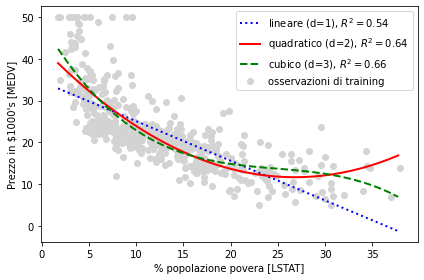

In [79]:
# modelliamo la relazione tra la risposta (il prezzo della casa, MEDV) e LSTAT (la percentuale di popolazione povera) 
# con un fit LINEARE, uno QUADRATICO ed uno CUBICO. E poi li confrontiamo.

X = df[['LSTAT']].values
y = df['MEDV'].values

# creiamo i predittori quadratici e cubici
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fittiamo il modello lineare: 
regr = LinearRegression()
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

# fittiamo il modello quadratico: 
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

# fittiamo il modello cubico
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

# plottiamo infine i risultati
plt.scatter(X, y, label='osservazioni di training', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='lineare (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='quadratico (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='cubico (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('% popolazione povera [LSTAT]')
plt.ylabel('Prezzo in $1000\'s [MEDV]')
plt.legend(loc='upper right')

plt.tight_layout()
# plt.savefig('./figures/polyhouse_example.png', dpi=300)
plt.show()

**Note al precedente plot**:<br><br>
Visivamente sembra che il fit cubico sia il migliore. Tuttavia ciò va sempre verificato su dati di test.<br><br>
In generale, infatti, l'aggiunta di potenze del predittore rende il modello sempre più complesso, magari difficile da interpretare e comunque potenzialmente soggetto ad overfitting. <br><br>
Inoltre, le potenze di un predittore non sempre sono la miglior soluzione per modellare un fenomeno non-lineare.<br><br>
In questo caso, ad esempio, plottiamo lo scatterplot di MEDV vs LSTAT.

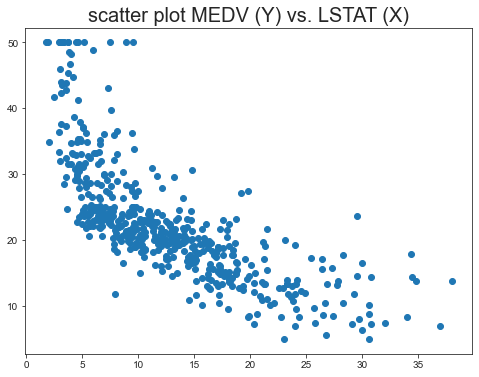

In [116]:
import matplotlib.pylab as plt # per i log serve matplotlib
fig = plt.figure(figsize=(8, 6))
plt.scatter(df['LSTAT'],df['MEDV'])
plt.title("scatter plot MEDV (Y) vs. LSTAT (X)",fontsize=20)
plt.show()

In [117]:
# Forse una log-trasformazione di LSTAT e la radice-quadrata di MEDV possono proiettare i dati in uno spazio adatto alla
# regressione lineare.

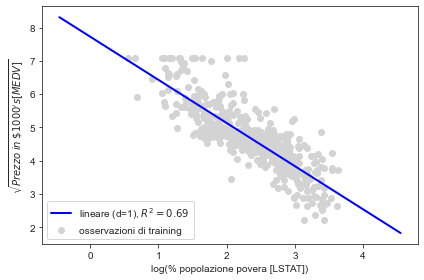

In [118]:
X = df[['LSTAT']].values
y = df['MEDV'].values

# trasformazione delle due variabili (con numpy)
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# fit 
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]

regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# plot
plt.scatter(X_log, y_sqrt, label='osservazioni di training', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='lineare (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2)

plt.xlabel('log(% popolazione povera [LSTAT])')
plt.ylabel('$\sqrt{Prezzo \; in \; \$1000\'s [MEDV]}$')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

array([[<AxesSubplot:title={'center':'LSTAT'}>]], dtype=object)

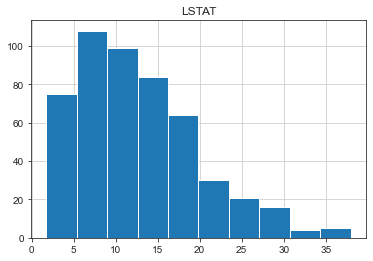

In [119]:
df[['LSTAT']].hist()

In [120]:
# R2 = 0.69 è (leggermente) migliore di quello fornito dai precedenti fit polinomiali (0.54, 0.64,0.66)

L'aggiunta nel modello di potenze dei predittori ha, come detto, l'effetto di **curvare** lo spazio dei predittori.
Ecco un esempio relativo alla classificazione ed alla curvatura dei decision boundary [Come detto, lo stesso effetto si può avere sul fit della regressione]:<br>
![](images_regressione/Curvatura_spazio.png)

## Regressione logistica
* Un metodo di classificazione standard, nato negli anni '40 del secolo scorso.
* Il classificatore ML spesso  **più efficace** (Deep Learning a parte).
* E' il primo classificatore **parametrico** di questo corso (knn, alberi ed ensemble sono non-parametrici)

## Gestione dei Missing Values (aka, Not Available oppure NaN=Not a Number)
La loro presenza impatta differentemente sui vari metodi di ML; alcuni di essi (ad es. LDA) sensibili" (influenzati) dalla loro presenza, altri meno, ad es. alberi)
[utile link](https://machinelearningmastery.com/handle-missing-data-python/)

In [102]:
# load and summarize the dataset (ricco di MV/NA)
from pandas import read_csv
# load the dataset
dataset = read_csv('data_regressione/pima-indians-diabetes.csv', header=None)
print(dataset.shape)

(768, 9)


[descrizione del dataset](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names)

In [103]:
# summarize the dataset
print(dataset.describe())

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [123]:
# We can see that there are columns that have a minimum value of zero (0). On some columns, a value of zero does not make 
# sense and indicates an invalid or missing value.

# In fact, this dataset is known to have missing values. Specifically, there are missing observations for some columns 
# that are marked as a zero value. (a zero for body mass index or blood pressure is invalid.)

# Specifically, the columns 1-to-5 have an invalid zero minimum value:

In [104]:
# example of summarizing the number of missing values for each variable.
num_missing = (dataset[[1,2,3,4,5]] == 0).sum()
# report the results
print(num_missing)

1      5
2     35
3    227
4    374
5     11
dtype: int64


In [105]:
# We can see that columns 1,2 and 5 have just a few zero values, whereas columns 3 and 4 show a lot more, nearly half of the 
# rows. This highlights that different “missing value” strategies may be needed for different columns, e.g. to ensure that 
# there are still a sufficient number of records left to train a predictive model.

# In Python, specifically Pandas, NumPy and Scikit-Learn, we mark missing values as NaN.
# Values with a NaN value are ignored from operations like sum, count, etc.
# We can mark values as NaN easily with the Pandas DataFrame by using the replace() function on a subset of the columns we 
# are interested in.
# After we have marked the missing values, we can use the isnull() function to mark all of the NaN values in the dataset as 
# True and get a count of the missing values for each column.

In [106]:
# example of marking missing values with nan values

# replace '0' values with 'nan'
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0,np.nan)
# count the number of nan values in each column
print(dataset.isnull().sum())

0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64


In [107]:
dataset.head()

,0,1,2,3,4,5,6,7,8
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [128]:
# We can see that the columns 1:5 have the same number of missing values as zero values identified above. 
# This is a sign that we have marked the identified missing values correctly.

In [129]:
# print the first 20 rows of data (with NaN, now)
print(dataset.head(20))

     0      1     2     3      4     5      6   7  8
0    6  148.0  72.0  35.0    NaN  33.6  0.627  50  1
1    1   85.0  66.0  29.0    NaN  26.6  0.351  31  0
2    8  183.0  64.0   NaN    NaN  23.3  0.672  32  1
3    1   89.0  66.0  23.0   94.0  28.1  0.167  21  0
4    0  137.0  40.0  35.0  168.0  43.1  2.288  33  1
5    5  116.0  74.0   NaN    NaN  25.6  0.201  30  0
6    3   78.0  50.0  32.0   88.0  31.0  0.248  26  1
7   10  115.0   NaN   NaN    NaN  35.3  0.134  29  0
8    2  197.0  70.0  45.0  543.0  30.5  0.158  53  1
9    8  125.0  96.0   NaN    NaN   NaN  0.232  54  1
10   4  110.0  92.0   NaN    NaN  37.6  0.191  30  0
11  10  168.0  74.0   NaN    NaN  38.0  0.537  34  1
12  10  139.0  80.0   NaN    NaN  27.1  1.441  57  0
13   1  189.0  60.0  23.0  846.0  30.1  0.398  59  1
14   5  166.0  72.0  19.0  175.0  25.8  0.587  51  1
15   7  100.0   NaN   NaN    NaN  30.0  0.484  32  1
16   0  118.0  84.0  47.0  230.0  45.8  0.551  31  1
17   7  107.0  74.0   NaN    NaN  29.6  0.254 

In [130]:
# Having missing values in a dataset can cause errors with some machine learning algorithms, eg.LDA (not with Carts).
# Options available are: 1) delete rows with Nan:

In [131]:
dataset.dropna(inplace=True)
# summarize the shape of the data with missing rows removed
print(dataset.shape)
print(dataset.head(20))

(392, 9)
     0      1      2     3      4     5      6   7  8
3    1   89.0   66.0  23.0   94.0  28.1  0.167  21  0
4    0  137.0   40.0  35.0  168.0  43.1  2.288  33  1
6    3   78.0   50.0  32.0   88.0  31.0  0.248  26  1
8    2  197.0   70.0  45.0  543.0  30.5  0.158  53  1
13   1  189.0   60.0  23.0  846.0  30.1  0.398  59  1
14   5  166.0   72.0  19.0  175.0  25.8  0.587  51  1
16   0  118.0   84.0  47.0  230.0  45.8  0.551  31  1
18   1  103.0   30.0  38.0   83.0  43.3  0.183  33  0
19   1  115.0   70.0  30.0   96.0  34.6  0.529  32  1
20   3  126.0   88.0  41.0  235.0  39.3  0.704  27  0
24  11  143.0   94.0  33.0  146.0  36.6  0.254  51  1
25  10  125.0   70.0  26.0  115.0  31.1  0.205  41  1
27   1   97.0   66.0  15.0  140.0  23.2  0.487  22  0
28  13  145.0   82.0  19.0  110.0  22.2  0.245  57  0
31   3  158.0   76.0  36.0  245.0  31.6  0.851  28  1
32   3   88.0   58.0  11.0   54.0  24.8  0.267  22  0
35   4  103.0   60.0  33.0  192.0  24.0  0.966  33  0
39   4  111.0   72.

In [132]:
# Other options: 2) impute missing data:

# Imputing refers to using a model to replace missing values.

# There are many options we could consider when replacing a missing value, for example:

# - A constant value that has meaning within the domain, such as 0, distinct from all other values.
# - A value from another randomly selected record.
# - A mean, median or mode value for the column.
# - A value estimated by another predictive model.

In [133]:
# with the mean

# re-load the dataset
dataset = read_csv('data_regressione/pima-indians-diabetes.csv', header=None)
# mark zero values as missing or NaN
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, np.nan)
# fill missing values with median column values
dataset.fillna(dataset.median(), inplace=True)
# count the number of NaN values in each column
print(dataset.isnull().sum())
print(dataset.head(20))

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64
     0      1     2     3      4     5      6   7  8
0    6  148.0  72.0  35.0  125.0  33.6  0.627  50  1
1    1   85.0  66.0  29.0  125.0  26.6  0.351  31  0
2    8  183.0  64.0  29.0  125.0  23.3  0.672  32  1
3    1   89.0  66.0  23.0   94.0  28.1  0.167  21  0
4    0  137.0  40.0  35.0  168.0  43.1  2.288  33  1
5    5  116.0  74.0  29.0  125.0  25.6  0.201  30  0
6    3   78.0  50.0  32.0   88.0  31.0  0.248  26  1
7   10  115.0  72.0  29.0  125.0  35.3  0.134  29  0
8    2  197.0  70.0  45.0  543.0  30.5  0.158  53  1
9    8  125.0  96.0  29.0  125.0  32.3  0.232  54  1
10   4  110.0  92.0  29.0  125.0  37.6  0.191  30  0
11  10  168.0  74.0  29.0  125.0  38.0  0.537  34  1
12  10  139.0  80.0  29.0  125.0  27.1  1.441  57  0
13   1  189.0  60.0  23.0  846.0  30.1  0.398  59  1
14   5  166.0  72.0  19.0  175.0  25.8  0.587  51  1
15   7  100.0  72.0  29.0  125.0  30.0  0.484  32  1
16   0  118.0  84.0  47

Questionario che il sottoscrittore di una polizza assicurativa deve compilare prima della stipula della polizza.
C'è un campo "stipendio annuo"; c'è anche un altro campo "dipendente", con 0=1 dipendente a tempo pieno, 1=dipendente part-time, 2= libero professionista.<br>
Si è visto in questi questionari che spesso il campo "stipendio" è preferenzialmente lasciato vuoto dai liberi professionisti.<br>
Gli NA della colonna 'stipendio' sono cioè correlati con il valore della colonna 'dipendente'. Quindi, non possiamo valorizzare gli NA di 'stipendio' semplicemenete con la mediana/media della colonna stessa. Dobbiamo invece valorizzare questi NA (di 'stipendio') con la media della colonna FILTRATA per tipo dipendente. Ciò perchè molto probabilmente chi non ha valorizzato la colonna 'stipendio' are appunto un libero professionista.

Linee-guida:
* sostituire eventuali valori out-of-range (ad es. 0 oppure 999) che marcano (impropriamente gli NA) con la notazione NaN;
* se la percentuale di righe del dataset con NaN non è alta, si può pensare di eliminare tali righe;
* diversamente, **l'approccio probabilmente più semplice e pratico è quello di sostituire gli NaN con la mediana di colonna**;
* verificare preliminarmente che gli NaN della colonna in oggetto NON abbiano relazioni con i valori di altre colonne; in questo caso, utilizzare la mediana della colonna con gli NaN filtrata sui valori delle altre colonne;
* infine, in casi particolarmente complessi, si possono costruire modelli predittivi dei valori mancanti.

[Link Wikipedia EN](https://en.wikipedia.org/wiki/Missing_data)

## Sintesi
Come visto in questo notebook, il metodo della regressione lineare, come anche gli altri modelli di ML, richiede la verifica delle assunzioni, la capacità di leggere i risultati, la comprensione del contesto applicativo e un'etica consapevole nella sua applicazione. Tutto ciò mal si adatta con il Machine Learning *informatico*, che privilegia la *quantità* di modelli prodotti a discapito della loro utilità.

[Sinossi dei vari tipi di regressione](https://sites.google.com/view/datascience-cheat-sheets#h.druswnmmfik9)

# Altri Casi d'Uso

## Il dataset Ames Housing
Questo dataset contiene informazioni su **proprietà residenziali private** nella cittadina di Ames (Iowa) raccolte nel periodo 2006-2010.<br><br>
La descrizione del dataset è [qui](http://jse.amstat.org/v19n3/decock.pdf).<br><br>
Ulteriore documentazione sulle feature del dataset è [qui](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt).<br><br>
Il dataset è disponibile in formato *txt* separato con *tab* [qui](http://jse.amstat.org/v19n3/decock/AmesHousing.txt). E' formato da **2930 righe e 80 feature**.<br><br>
Come sempre prima di ogni applicazione di Machine Learning, è utile una breve (od approfondita!) esplorazione del dataset, sia tabellare che grafica.

In [134]:
import pandas as pd
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',       # per semplicità, restringiamo la nostra analisi ad un 
           'Central Air', 'Total Bsmt SF', 'SalePrice']         # sottoinsieme di 5 feature ('SalePrice' è la risposta)
df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', 
                 sep='\t',
                 usecols=columns)
df.head()


,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [135]:
df.shape    

(2930, 6)

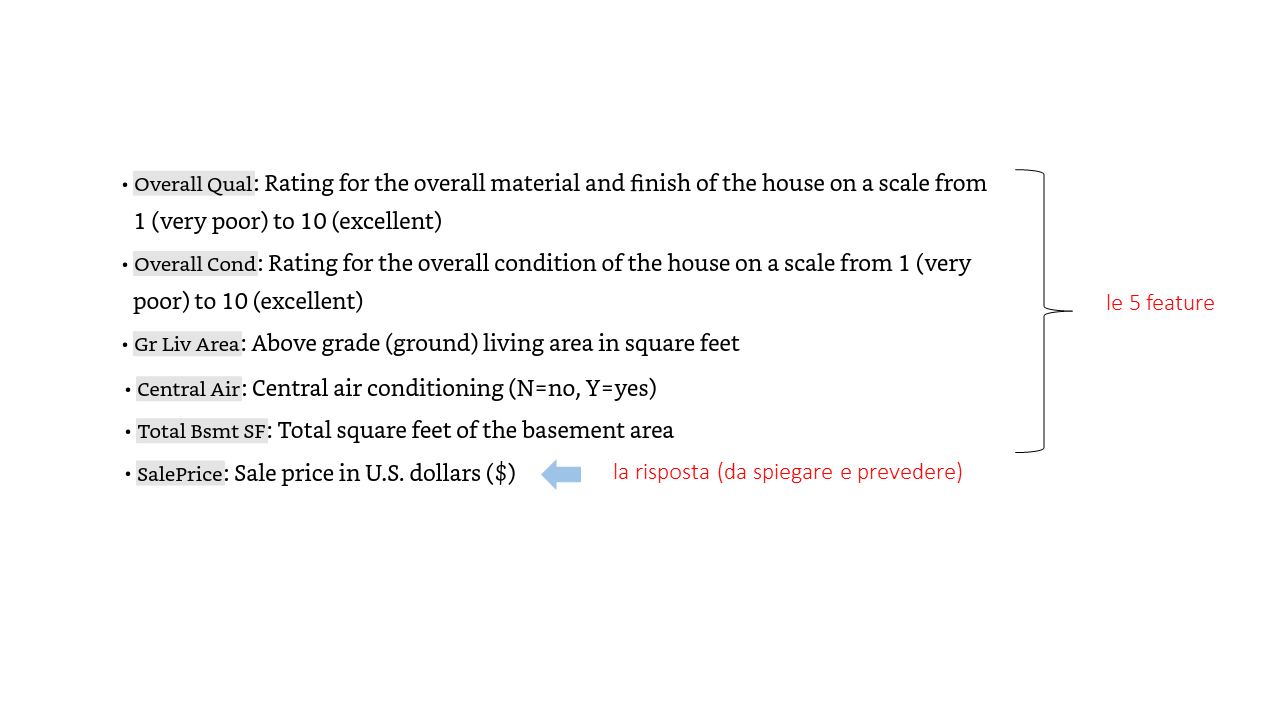

In [136]:
Image(filename='images_regressione/Ames_variables.png', width=1200)    # Il significato delle 6 variabili.

In [137]:
df.dtypes                # I data type.
                         # 'Central Air' è una variabile binaria codificata come stringa (object).
                         # Dev'essere convertita.

Overall Qual       int64
Overall Cond       int64
Total Bsmt SF    float64
Central Air       object
Gr Liv Area        int64
SalePrice          int64
dtype: object

In [138]:
df['Central Air'] = pd.factorize(df['Central Air'])[0] # converte sì/no in 1/0 e converte il data-type in intero.
                                                       # [0] serve ad ottenere solo i valori e non anche gli indici.
                                                       # una possibile alternativa è il metodo di pandas 'map'.

In [139]:
df.dtypes                # ok, ora (è un data type adatto alla Regressione)

Overall Qual       int64
Overall Cond       int64
Total Bsmt SF    float64
Central Air        int64
Gr Liv Area        int64
SalePrice          int64
dtype: object

In [140]:
df['Central Air'].value_counts()    # 1: presenza di condizionatore; 0, no.

0    2734
1     196
Name: Central Air, dtype: int64

In [141]:
# ci sono missing values?
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [142]:
# Poichè abbiamo un dataset abbastanza grande, la cosa più semplice è rimuovere l'intera riga con il missing value:
df = df.dropna(axis=0)
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

Ora facciamo un pò di **analisi esplorativa dei dati** (EDA = Explorative Data Analysis):
* outlier?
* la distribuzione dei dati;
* le relazioni tra le feature.<br>

Useremo delle funzioni disponibili nel package `mlxtend`. Occorre prima fare `pip install mlxtend` da un prompt anaconda.<br>
Per prima cosa visualizzeremo una **scatterplot matrix**:

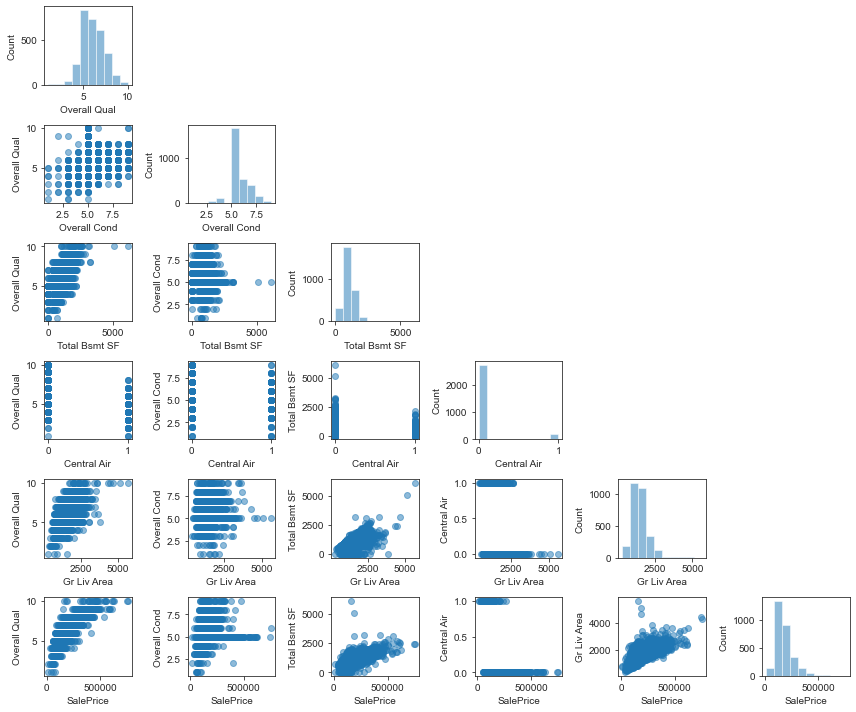

In [144]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
scatterplotmatrix(df.values, figsize=(12, 10), 
                  names=df.columns, alpha=0.5)
plt.tight_layout()
plt.show()
                             # --> possiamo vedere rapidamente come i dati sono distribuiti e se ci sono outlier.
                             #     Ad esempio (ultima riga, quinta colonna da sx), si nota che c'è una relazione abbastanza
                             #     lineare tra la dimensione dell'area living (Gr Liv Area) ed il prezzo di vendita (SalePrice).
            
                             # --> Inoltre, l'istogramma dell'ultima riga/ultima colonna a dx mostra che 'SalePrice' ha una 
                             #     distribuzione assimmetrica a causa di parecchi outlier

<AxesSubplot:>

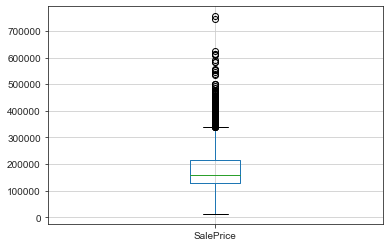

In [145]:
df[['SalePrice']].boxplot()    # <-- ed infatti, ecco qui gli outlier.

In [146]:
# Ed ora la matrice di correlazione delle variabili:
df.corr()
                          # in un'analisi di regressione siamo interessati a feature / predittori che sono correlati con 
                          # la risposta ma non tra di loro.
                          # 'SalePrice' correla soprattutto con 'Overall Qual' (0.80)  e 'Gr Liv Area' (0.71).

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
Overall Qual,1.000000,-0.094219,0.547294,-0.287443,0.570304,0.799138
Overall Cond,-0.094219,1.000000,-0.173344,-0.119611,-0.115176,-0.101191
Total Bsmt SF,0.547294,-0.173344,1.000000,-0.218726,0.444675,0.632280
Central Air,-0.287443,-0.119611,-0.218726,1.000000,-0.123358,-0.264700
Gr Liv Area,0.570304,-0.115176,0.444675,-0.123358,1.000000,0.706628
SalePrice,0.799138,-0.101191,0.632280,-0.264700,0.706628,1.000000


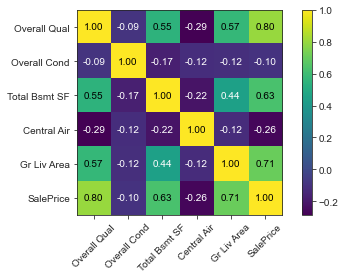

In [147]:
# possiamo visualizzare la matrice di correlazione anche con una HEATMAP:
import numpy as np
from mlxtend.plotting import heatmap
cm = np.corrcoef(df.values.T)                 # esiste anche il metodo pandas 'corr'
hm = heatmap(cm, row_names=df.columns, column_names=df.columns)
plt.tight_layout()
plt.show()


In [148]:
# ora, la regressione UNIVARIATA di 'SalePrice' rispetto a 'Gr Liv Area':
from sklearn.linear_model import LinearRegression    # efficiente classe che usa la libreria LAPACK.
                                                     # questa classe funziona meglio con dati non standardizzati.

X = df[['Gr Liv Area']].values                       # '.values' trasforma il dataframe pandas in un'array numpy.
y = df['SalePrice'].values

slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Intercept: {slr.intercept_:.3f}')

Slope: 111.666
Intercept: 13342.979


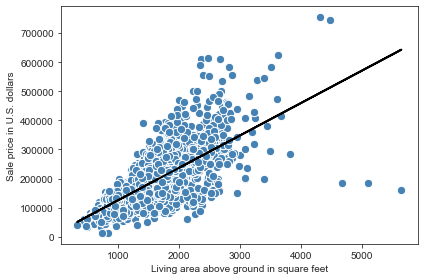

In [149]:
# per visualizzare come la retta di regressione fitta i dati, usiamo una funzione custom:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)

# applicata ora ai nostri dati:
lin_regplot(X, y, slr)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.tight_layout()
plt.show()


In [150]:
slr.score(X, y)   # il coefficiente R^2.

0.4993234449379995

Nella regressione univariata (1 predittore) il coefficiente R^2 è uguale al quadrato della correlazione tra x e y.<br>
Nella regressione multivariata (molti predittori) il coefficiente R^2 è uguale al quadrato della correlazione tra y ed y stimata.<br>
Verifichiamo la prima, dunque.

In [151]:
np.corrcoef(np.reshape(X,-1),y)[0,1]**2   
                                           # np.corrcoef richiede che i due vettori abbiano la stessa dimensione; a questo scopo
                                           # si può usare, come una delle possibilità, il metodo 'reshape'. (post so 13730468)
        
                                           # per l'elevazione di un numero al quadrato vedi il post so 25870923.
                                           # np.corcoeff fornisce la matrice di correlazione 2x2 dei due vettori. Usiamo la  
                                           # seconda componente della prima riga.

0.4993234449379995

In [152]:
 # l'errore di previsione (RMSE):
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_pred, y))
print("Root Mean Squarred Error is : ",rmse)

                     # --> in media, l'errore delle previsioni è +/- 56510.

Root Mean Squarred Error is :  56510.95086219203


Per confrontare le differenze di fit a seconda del metodo usato (GD, SGD, forma chiusa, fattorizzazione QR, SVD) si può usare lo stimatore `LinearRegression` di `mlxtend`, disponibile [qui](http://rasbt.github.io/mlxtend/user_guide/regressor/LinearRegression/).<br>
Un'altra eccellente libreria in Python che implementa ottime funzioni di regressione è: `statsmodels` (vedi [qui](https://www.statsmodels.org/stable/examples/index.html#regression)).

## Il dataset Startups
Questo dataset contiene dati di 50 startup di New York, California e Florida.<br>
Le feature sono: *R&D spending*, *Administration Spending*, *Marketing Spending*, *State*. <br>
La risposta è: *Profit*.<br>
Il dataset è disponibile [qui](https://www.kaggle.com/farhanmd29/50-startups).

In [153]:
df = pd.read_csv('data_regressione/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


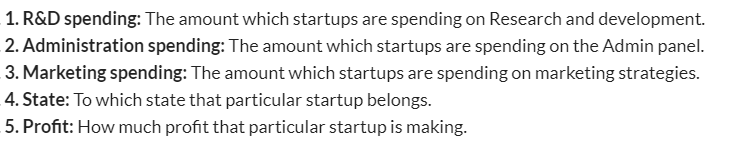

In [154]:
Image(filename='images_regressione/startups_variables.png', width=600)    # Il significato delle 6 variabili.

In [155]:
import numpy as np              # for performing mathematical calculations behind ML algorithms
import matplotlib.pyplot as plt # for visualization
import pandas as pd             # for handling and cleaning the dataset
import seaborn as sns           # for visualization
import sklearn                  # for model evaluation and development

In [156]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [157]:
df.shape

(50, 5)

In [158]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [159]:
df.describe()   # solo per le variabili numeriche

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [160]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [161]:
df.duplicated().sum()   # non ci sono valori ripetuti nel dataset

0

In [162]:
df.info()               # altre info sul dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [163]:
df.corr()               # la matrice di correlazione

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


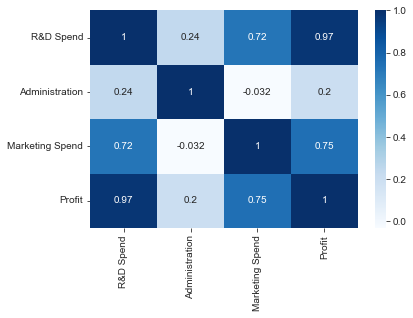

In [164]:
# la matrice di correlazione visualizzata con una heatmap:
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

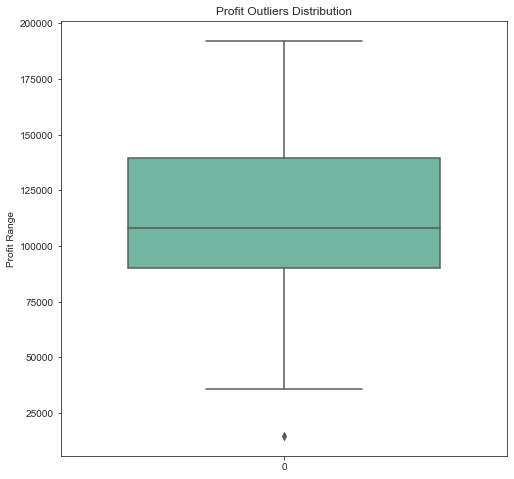

In [165]:
# Outlier per 'Profit'?
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=df['Profit'], orient="v", palette="Set2" , width=0.7) 
plt.title("Profit Outliers Distribution")
plt.ylabel("Profit Range")

plt.show()
                          # --> non ci sono outlier in 'Profit'

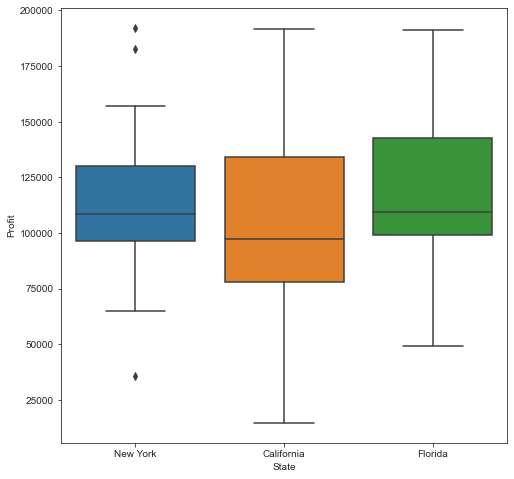

In [166]:
# le distribuzioni di 'profit' per 'State':
sns.boxplot(x = 'State', y = 'Profit', data = df)
plt.show()
                         # --> tutti gli outlier sono a New York;
                         #     le startup della California hanno la massima escursione del 'Profit'.


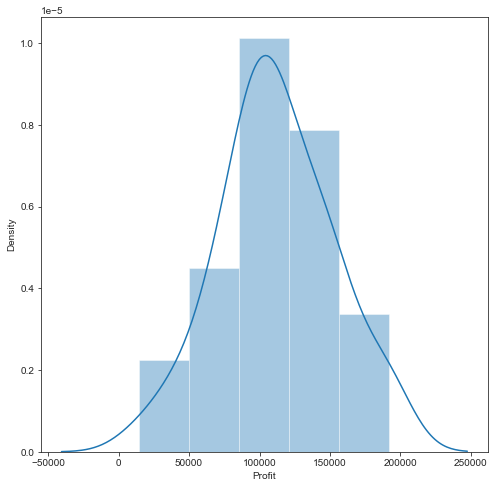

In [167]:
# l'istogramma di 'Profit':

import warnings                   
warnings.filterwarnings("ignore")    # ignora i warning 

sns.distplot(df['Profit'],bins=5,kde=True)
plt.show()
                                     # --> il 'Profit' medio (intorno a 100K) è quello più frequente (ovviamente)


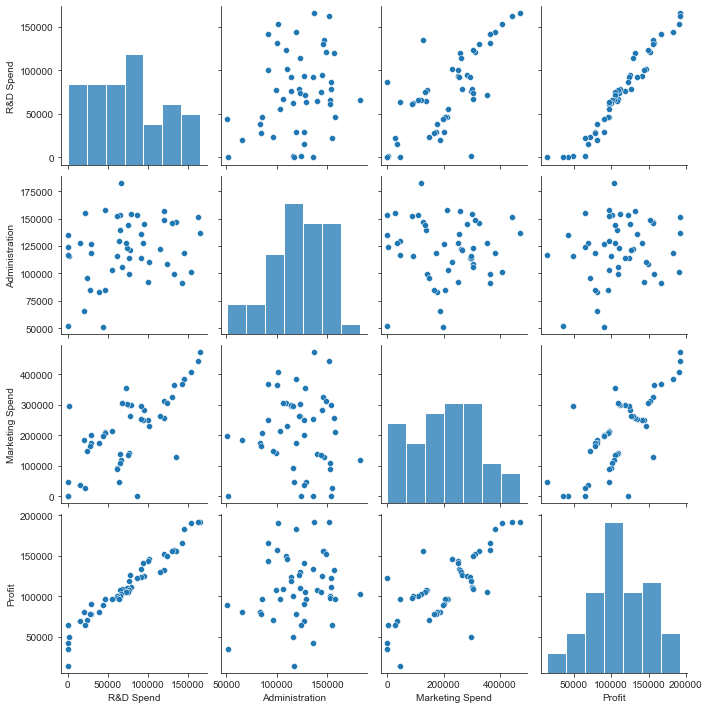

In [171]:
sns.pairplot(df)
plt.show()
                       # --> le spese in R&D sono direttamente proporzionali al profitto;
                       #     anche le spese in Marketing, ma con più dispersione;
                       #     non c'è invece relazione tra le spese amministrative ed il profitto.

In [172]:
# la preparazione delle variabili per il modello:

X = df.iloc[:, :-1].values  # i 4 predittori. il subsetting con 'iloc' trasforma il dataframe pandas in un'array numpy, e 
                            # come una delle conseguenze di ciò, perde i nomi delle variabili (le colonne di X sono ora 0,1,2,3).

y = df.iloc[:, 4].values    # la risposta

In [173]:
# la trasformazione di State. 
# NB. Nell'esempio Ames Housing, avevamo trasformato l'oggetto 'Central Air' con 'pd.factorize' perchè aveva solo due categorie].
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()                       # codifica le label della variabile con valori tra  0 and n_classes-1.
X[:, 3] = le.fit_transform(X[:, 3])       # la quarta variabile del dataframe, cioè 'State'
X1 = pd.DataFrame(X)
X1.head()

,0,1,2,3
0,165349.2,136897.8,471784.1,2
1,162597.7,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [174]:
le.classes_    # le classi generate

array(['California', 'Florida', 'New York'], dtype=object)

In [175]:
# lo split dei dati in training e test:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=0)

In [176]:
# il fit:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)
print('Model has been trained successfully')

Model has been trained successfully


In [177]:
# vediamo R^2 del modello:
y_pred = model.predict(x_test)
testing_data_model_score = model.score(x_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)

training_data_model_score = model.score(x_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)

Model Score/Performance on Testing data 0.9355139722149948
Model Score/Performance on Training data 0.9515496105627431


In [178]:
# from sklearn.metrics import r2_score         # un'alternativa a model.score(X, y).

In [179]:
# confronto tra valori previsti ed effettivi (sui dati di test):
df = pd.DataFrame(data={'Predicted value':y_pred,'Actual Value':y_test}) 
                                               # il metodo numpy '.flatten' restituisce una copia
                                               # dell'array collassata in una dimensione.
df

,Predicted value,Actual Value
0,104055.184238,103282.38
1,132557.602897,144259.40
2,133633.012845,146121.95
3,72336.280811,77798.83
4,179658.272109,191050.39
5,114689.631334,105008.31
6,66514.822490,81229.06
7,98461.693213,97483.56
8,114294.704870,110352.25
9,169090.511275,166187.94


In [180]:
 # l'errore di previsione (RMSE):
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("Root Mean Squarred Error is : ",rmse)

                     # --> in media, l'errore delle previsioni è +/- 7889.

Root Mean Squarred Error is :  7889.547666974603


In [1]:
! jupytext --to markdown notebook

"jupytext" non � riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.
